In [1]:
# Importing numpy for numerical operations
import numpy as np

# TensorFlow for building and training neural networks
import tensorflow as tf

# Pandas for data manipulation and analysis
import pandas as pd
import matplotlib as mpl

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# Gensim for topic modeling, document indexing, and similarity retrieval
import gensim as gs

# Module from sklearn to compute pairwise distances
import sklearn.metrics.pairwise as skpairwise

# Gensim downloader to access pre-trained models and datasets
import gensim.downloader as gdownloader

# Importing specific modules from matplotlib for clarity
from matplotlib import pyplot as plt

# Typing module for type hints in function definitions
from typing import List, Tuple, Dict

In [2]:
# import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# tf.config.set_visible_devices([tf.config.list_physical_devices('GPU')[0]])
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4980412386712332421
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 11682217289407975991
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
1 Physical GPUs, 1 Logical GPU


2023-11-08 14:37:28.675056: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-11-08 14:37:28.675075: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-08 14:37:28.675082: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-08 14:37:28.675116: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 14:37:28.675133: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-11-08 14:37:28.676367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been buil

In [3]:
# import tensorflow as tf

# tf.config.list_physical_devices('GPU')

In [4]:
x_train: np.ndarray = None
x_test: np.ndarray = None
y_train: np.ndarray = None
y_test: np.ndarray = None
# (x_train, y_train), (x_test, y_test) = (
#     tf.keras.datasets.cifar100.load_data(label_mode="fine"))

import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the data directory
data_dir = "./CUB/CUB_200_2011/images"

# Initialize empty lists to store image paths and labels
x = []
y = []

# Iterate through the subdirectories, where each subdirectory represents a class
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        class_label = int(class_folder.split(".")[0]) - 1  # Subtract 1 to make labels start from 0

        for image_filename in os.listdir(class_path):
            image_path = os.path.join(class_path, image_filename)
            x.append(image_path)
            y.append(class_label)

# Convert the lists to NumPy arrays
x = np.array(x)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# # Optionally, you can shuffle the data if needed
# shuffle_indices = np.random.permutation(len(x_train))
# x_train = x_train[shuffle_indices]
# y_train = y_train[shuffle_indices]

# Now, you have x_train, y_train, x_test, and y_test containing the CUB-200-2011 dataset.

In [5]:
print(f"Train images shape: {x_train.shape}")
print(f"Train fine labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test fine labels shape: {y_test.shape}")

Train images shape: (8907,)
Train fine labels shape: (8907,)
Test images shape: (2227,)
Test fine labels shape: (2227,)


In [6]:
# Print some basic information about the dataset
print("CUB-200-2011 dataset information:")
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Number of classes:", len(np.unique(y)))
print("Sample image path:", x_train[0])
print("Sample image label:", y_train[0])

CUB-200-2011 dataset information:
Number of training samples: 8907
Number of testing samples: 2227
Number of classes: 189
Sample image path: ./CUB/CUB_200_2011/images/056.Rose_breasted_Grosbeak/Rose_Breasted_Grosbeak_0101_39495.jpg
Sample image label: 55


In [7]:
print(f"Train images shape: {x_train.shape}")
print(f"Train fine labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test fine labels shape: {y_test.shape}")

Train images shape: (8907,)
Train fine labels shape: (8907,)
Test images shape: (2227,)
Test fine labels shape: (2227,)


In [8]:
print(np.unique(np.append(y_train, y_test)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188]


In [9]:
print(np.unique(np.append(y_train, y_test)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188]


In [10]:
# Define the path to the "classes.txt" file
classes_file_path = "./CUB/CUB_200_2011/classes.txt"

# Initialize an empty list to store class names
labels = []

# Read the class names from the file
with open(classes_file_path, "r") as file:
    for line in file:
        #class_name = line.strip().split(" ", 1)[1]  # Extract the class name part
        labels.append(line.split(".")[1])  # Remove the numeric prefix

# Now, you have the labels list containing class names without the numeric prefixes
print(labels)


fine_labels: List[str] = ['Black_footed_Albatross', 'Sooty_Albatross', 'Groove_billed_Ani', 'Crested_Auklet', 'Least_Auklet', 'Parakeet_Auklet', 'Rhinoceros_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Rusty_Blackbird', 'Yellow_headed_Blackbird', 'Bobolink', 'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Cardinal', 'Spotted_Catbird', 'Gray_Catbird', 'Yellow_breasted_Chat', 'Eastern_Towhee', 'Chuck_will_Widow', 'Brandt_Cormorant', 'Red_faced_Cormorant', 'Pelagic_Cormorant', 'Bronzed_Cowbird', 'Shiny_Cowbird', 'Brown_Creeper', 'American_Crow', 'Fish_Crow', 'Black_billed_Cuckoo', 'Mangrove_Cuckoo', 'Yellow_billed_Cuckoo', 'Gray_crowned_Rosy_Finch', 'Purple_Finch', 'Northern_Flicker', 'Acadian_Flycatcher', 'Great_Crested_Flycatcher', 'Least_Flycatcher', 'Olive_sided_Flycatcher', 'Scissor_tailed_Flycatcher', 'Vermilion_Flycatcher', 'Yellow_bellied_Flycatcher', 'Frigatebird', 'Northern_Fulmar', 'Gadwall', 'American_Goldfinch', 'European_Goldfinch', 'Boat_tailed_Grackle', 'Eared_Grebe', 'Horned_Grebe', 'Pied_billed_Grebe', 'Western_Grebe', 'Blue_Grosbeak', 'Evening_Grosbeak', 'Pine_Grosbeak', 'Rose_breasted_Grosbeak', 'Pigeon_Guillemot', 'California_Gull', 'Glaucous_winged_Gull', 'Herring_Gull', 'Ivory_Gull', 'Ring_billed_Gull', 'Slaty_backed_Gull', 'Western_Gull', 'Anna_Hummingbird', 'Ruby_throated_Hummingbird', 'Rufous_Hummingbird', 'Long_tailed_Jaeger', 'Blue_Jay', 'Florida_Jay', 'Green_Jay', 'Dark_eyed_Junco', 'Tropical_Kingbird', 'Gray_Kingbird', 'Belted_Kingfisher', 'Green_Kingfisher', 'Pied_Kingfisher', 'Ringed_Kingfisher', 'White_breasted_Kingfisher', 'Red_legged_Kittiwake', 'Horned_Lark', 'Pacific_Loon', 'Mallard', 'Western_Meadowlark', 'Hooded_Merganser', 'Red_breasted_Merganser', 'Mockingbird', 'Nighthawk', 'Clark_Nutcracker', 'White_breasted_Nuthatch', 'Baltimore_Oriole', 'Hooded_Oriole', 'Orchard_Oriole', 'Scott_Oriole', 'Ovenbird', 'Brown_Pelican', 'White_Pelican', 'Western_Wood_Pewee', 'American_Pipit', 'Whip_poor_Will', 'Horned_Puffin', 'Common_Raven', 'White_necked_Raven', 'American_Redstart', 'Loggerhead_Shrike', 'Great_Grey_Shrike', 'Baird_Sparrow', 'Black_throated_Sparrow', 'Brewer_Sparrow', 'Chipping_Sparrow', 'Clay_colored_Sparrow', 'House_Sparrow', 'Field_Sparrow', 'Fox_Sparrow', 'Grasshopper_Sparrow', 'Harris_Sparrow', 'Le_Conte_Sparrow', 'Lincoln_Sparrow', 'Nelson_Sharp_tailed_Sparrow', 'Savannah_Sparrow', 'Seaside_Sparrow', 'Song_Sparrow', 'Tree_Sparrow', 'Vesper_Sparrow', 'White_crowned_Sparrow', 'White_throated_Sparrow', 'Cape_Glossy_Starling', 'Bank_Swallow', 'Barn_Swallow', 'Cliff_Swallow', 'Tree_Swallow', 'Scarlet_Tanager', 'Summer_Tanager', 'Artic_Tern', 'Black_Tern', 'Caspian_Tern', 'Common_Tern', 'Elegant_Tern', 'Least_Tern', 'Green_tailed_Towhee', 'Brown_Thrasher', 'Sage_Thrasher', 'Black_capped_Vireo', 'Blue_headed_Vireo', 'Philadelphia_Vireo', 'Red_eyed_Vireo', 'Warbling_Vireo', 'White_eyed_Vireo', 'Yellow_throated_Vireo', 'Bay_breasted_Warbler', 'Black_and_white_Warbler', 'Black_throated_Blue_Warbler', 'Blue_winged_Warbler', 'Canada_Warbler', 'Cape_May_Warbler', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Golden_winged_Warbler', 'Hooded_Warbler', 'Kentucky_Warbler', 'Magnolia_Warbler', 'Mourning_Warbler', 'Myrtle_Warbler', 'Nashville_Warbler', 'Orange_crowned_Warbler', 'Palm_Warbler', 'Pine_Warbler', 'Prairie_Warbler', 'Prothonotary_Warbler', 'Tennessee_Warbler', 'Wilson_Warbler', 'Worm_eating_Warbler', 'Yellow_Warbler', 'Northern_Waterthrush', 'Louisiana_Waterthrush', 'Bohemian_Waxwing', 'Cedar_Waxwing', 'American_Three_toed_Woodpecker', 'Pileated_Woodpecker', 'Red_bellied_Woodpecker', 'Red_headed_Woodpecker', 'Downy_Woodpecker', 'Cactus_Wren', 'Carolina_Wren', 'House_Wren', 'Marsh_Wren', 'Rock_Wren', 'Winter_Wren', 'Common_Yellowthroat']
print(len(fine_labels))

['Black_footed_Albatross\n', 'Sooty_Albatross\n', 'Groove_billed_Ani\n', 'Crested_Auklet\n', 'Least_Auklet\n', 'Parakeet_Auklet\n', 'Rhinoceros_Auklet\n', 'Brewer_Blackbird\n', 'Red_winged_Blackbird\n', 'Rusty_Blackbird\n', 'Yellow_headed_Blackbird\n', 'Bobolink\n', 'Indigo_Bunting\n', 'Lazuli_Bunting\n', 'Painted_Bunting\n', 'Cardinal\n', 'Spotted_Catbird\n', 'Gray_Catbird\n', 'Yellow_breasted_Chat\n', 'Eastern_Towhee\n', 'Chuck_will_Widow\n', 'Brandt_Cormorant\n', 'Red_faced_Cormorant\n', 'Pelagic_Cormorant\n', 'Bronzed_Cowbird\n', 'Shiny_Cowbird\n', 'Brown_Creeper\n', 'American_Crow\n', 'Fish_Crow\n', 'Black_billed_Cuckoo\n', 'Mangrove_Cuckoo\n', 'Yellow_billed_Cuckoo\n', 'Gray_crowned_Rosy_Finch\n', 'Purple_Finch\n', 'Northern_Flicker\n', 'Acadian_Flycatcher\n', 'Great_Crested_Flycatcher\n', 'Least_Flycatcher\n', 'Olive_sided_Flycatcher\n', 'Scissor_tailed_Flycatcher\n', 'Vermilion_Flycatcher\n', 'Yellow_bellied_Flycatcher\n', 'Frigatebird\n', 'Northern_Fulmar\n', 'Gadwall\n', 'Ame

In [11]:
# fine_labels: List[str] = [
#     'apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
#     'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl',
#     'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can',
#     'castle', 'caterpillar', 'cattle', 'chair',
#     'chimpanzee', 'clock', 'cloud', 'cockroach',
#     'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
#     'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
#     'girl', 'hamster', 'house', 'kangaroo',
#     'computer_keyboard', 'lamp', 'lawn_mower',
#     'leopard', 'lion', 'lizard', 'lobster', 'man',
#     'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
#     'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
#     'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
#     'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
#     'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
#     'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
#     'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
#     'telephone', 'television', 'tiger', 'tractor', 'train',
#     'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
#     'willow_tree', 'wolf', 'woman', 'worm'
# ]

In [12]:
# y_train_str: np.ndarray = np.array(list(map(lambda x: np.array(
#     [fine_labels[x[0]]]), y_train)))
# y_test_str: np.ndarray = np.array(list(map(lambda x: np.array(
#     [fine_labels[x[0]]]), y_test)))

# print(f"Train fine labels strings shape: {y_train_str.shape}\n")
# print(f"Test fine labels strings shape: {y_test_str.shape}\n")
# print("All the fine labels strings values from the arrays:"
#       f"\n{np.unique(np.append(y_train_str, y_test_str))}")


# Assuming you have already extracted the class names into the "labels" list

# Map the integer labels in y_train and y_test to class labels
y_train_str = np.array([fine_labels[label] for label in y_train])
y_test_str = np.array([fine_labels[label] for label in y_test])

print(f"Train class labels shape: {y_train_str.shape}\n")
print(f"Test class labels shape: {y_test_str.shape}\n")
print("All the class labels values from the arrays:"
      f"\n{np.unique(np.append(y_train_str, y_test_str))}")


Train class labels shape: (8907,)

Test class labels shape: (2227,)

All the class labels values from the arrays:
['Acadian_Flycatcher' 'American_Crow' 'American_Goldfinch'
 'American_Pipit' 'American_Redstart' 'American_Three_toed_Woodpecker'
 'Anna_Hummingbird' 'Artic_Tern' 'Baird_Sparrow' 'Baltimore_Oriole'
 'Bank_Swallow' 'Barn_Swallow' 'Bay_breasted_Warbler' 'Belted_Kingfisher'
 'Black_Tern' 'Black_and_white_Warbler' 'Black_billed_Cuckoo'
 'Black_capped_Vireo' 'Black_footed_Albatross'
 'Black_throated_Blue_Warbler' 'Black_throated_Sparrow' 'Blue_Grosbeak'
 'Blue_Jay' 'Blue_headed_Vireo' 'Blue_winged_Warbler'
 'Boat_tailed_Grackle' 'Bobolink' 'Bohemian_Waxwing' 'Brandt_Cormorant'
 'Brewer_Blackbird' 'Brewer_Sparrow' 'Bronzed_Cowbird' 'Brown_Creeper'
 'Brown_Pelican' 'Brown_Thrasher' 'Cactus_Wren' 'California_Gull'
 'Canada_Warbler' 'Cape_Glossy_Starling' 'Cape_May_Warbler' 'Cardinal'
 'Carolina_Wren' 'Caspian_Tern' 'Cedar_Waxwing' 'Cerulean_Warbler'
 'Chestnut_sided_Warbler' 'Chipp

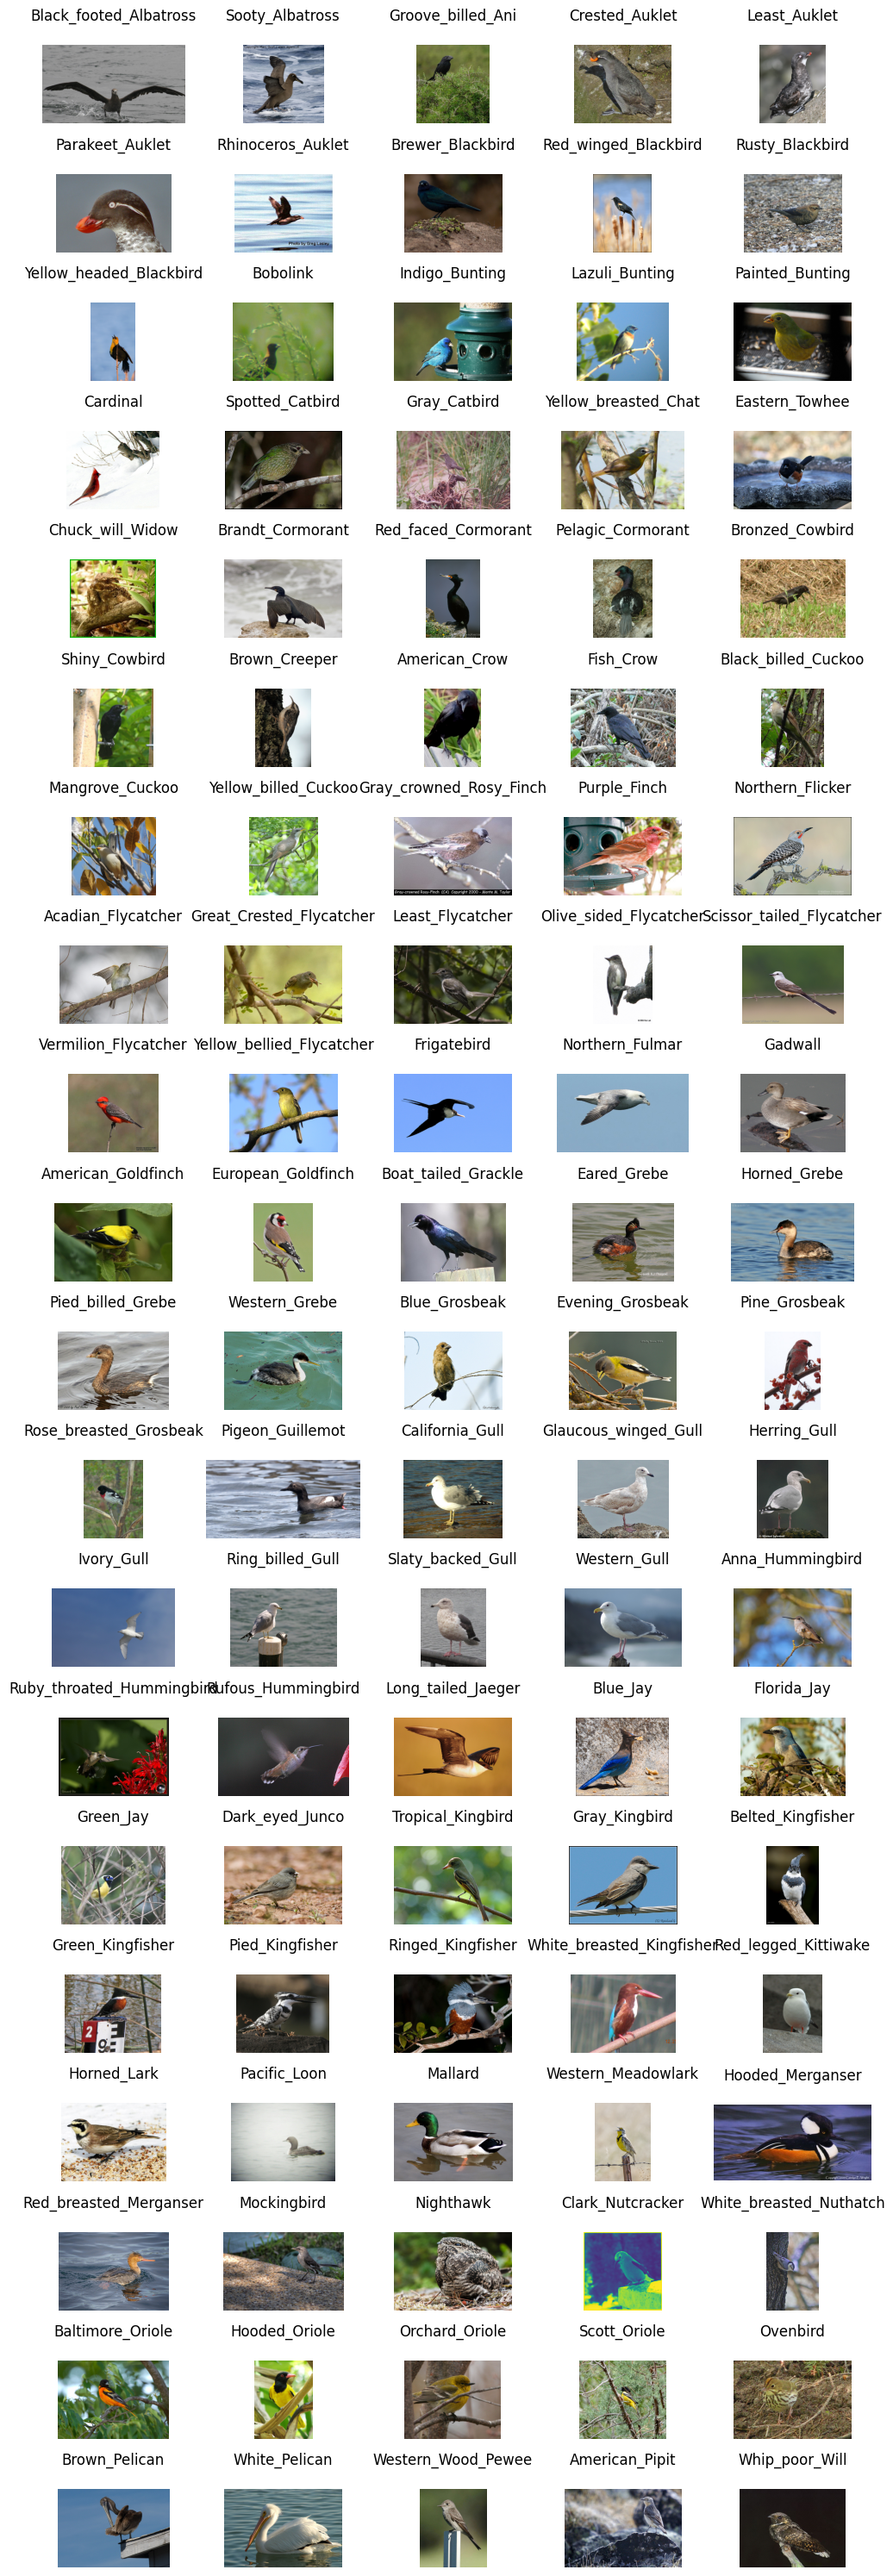

In [13]:
# # create figure
# fig: mpl.figure.Figure = None
# ax: mpl.axes.Axes = None
# fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(10, 30))

# i: int = 0  # i runs from 0 to (nrows*ncols-1) = 99
# axi: mpl.axes.Axes = None  # axi is equivalent with ax[rowid][colid]

# # for each fine label add an image to plot
# for i, axi in enumerate(ax.flat):
#     # get first index of image with with fine label i
#     index: int = np.where(y_train.reshape(y_train.shape[0]) == i)[0][0]
#     # get first image with fine label i
#     img: np.ndarray = x_train[index]
#     # add image to subplot
#     axi.imshow(img)
#     # remove axis from image
#     axi.axis('off')
#     # write title of image
#     axi.set_title(f"{y_train_str[index][0]}\n")

# fig.tight_layout()
# plt.show()



import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Create a figure with subplots
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(10, 30))

# Initialize the index to 0 and axi to None
index = 0
axi = None

# Loop through the subplots and add images
for i, axi in enumerate(ax.flat):
    # Find the index of the first image with the class label i
    index = np.where(y_train_str == fine_labels[i])[0][0]

    # Get the image file path with the class label i
    img_path = x_train[index]

    # Load the image using PIL
    img = Image.open(img_path)

    # Convert the image to a NumPy array
    img = np.array(img)

    # Add the image to the subplot
    axi.imshow(img)

    # Remove axis from the image
    axi.axis('off')

    # Write the title of the image
    axi.set_title(f"{fine_labels[i]}\n")

# Adjust the layout and display the figure
fig.tight_layout()
plt.show()

In [14]:
# conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
# !pip install ftfy regex tqdm
# !pip install git+https://github.com/openai/CLIP.git

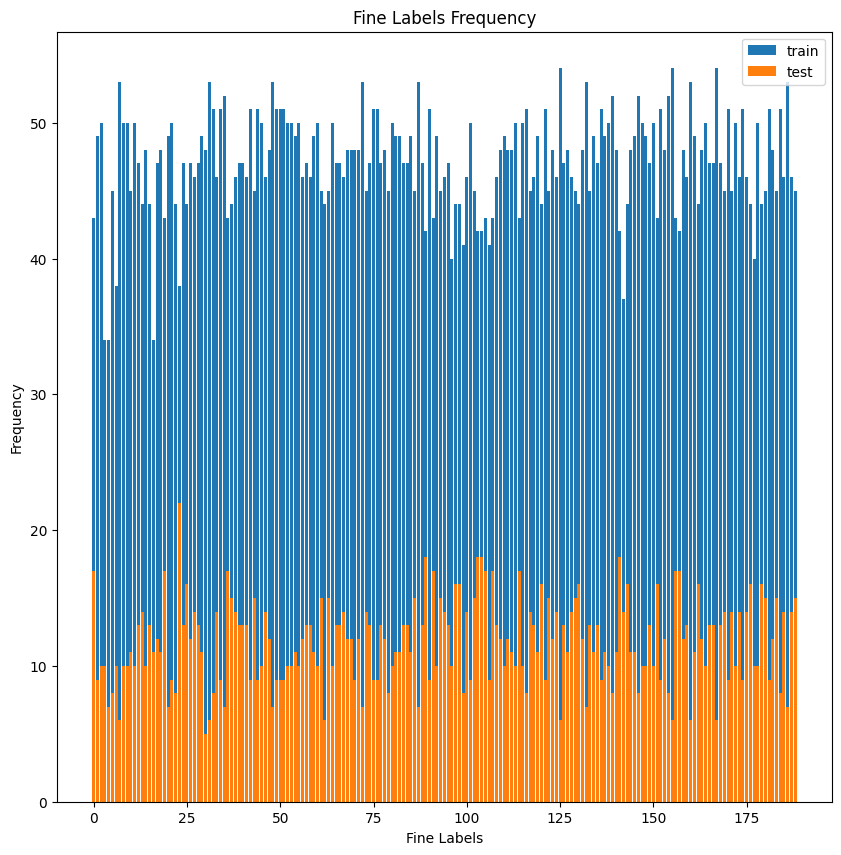

In [15]:
unique: np.ndarray = None
counts: int = 0

plt.figure(figsize=(10, 10))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, label='train')
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, label='test')

plt.title('Fine Labels Frequency')
plt.xlabel('Fine Labels')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [16]:
fast_text_vectors: gs.models.keyedvectors = gdownloader.load(
    "fasttext-wiki-news-subwords-300")

In [17]:
fine_labels_words: List[List[str]] = list(
    map(tf.keras.preprocessing.text.text_to_word_sequence, fine_labels))

word_list: List[str] = None
for word_list in fine_labels_words:
    print(word_list)

['black', 'footed', 'albatross']
['sooty', 'albatross']
['groove', 'billed', 'ani']
['crested', 'auklet']
['least', 'auklet']
['parakeet', 'auklet']
['rhinoceros', 'auklet']
['brewer', 'blackbird']
['red', 'winged', 'blackbird']
['rusty', 'blackbird']
['yellow', 'headed', 'blackbird']
['bobolink']
['indigo', 'bunting']
['lazuli', 'bunting']
['painted', 'bunting']
['cardinal']
['spotted', 'catbird']
['gray', 'catbird']
['yellow', 'breasted', 'chat']
['eastern', 'towhee']
['chuck', 'will', 'widow']
['brandt', 'cormorant']
['red', 'faced', 'cormorant']
['pelagic', 'cormorant']
['bronzed', 'cowbird']
['shiny', 'cowbird']
['brown', 'creeper']
['american', 'crow']
['fish', 'crow']
['black', 'billed', 'cuckoo']
['mangrove', 'cuckoo']
['yellow', 'billed', 'cuckoo']
['gray', 'crowned', 'rosy', 'finch']
['purple', 'finch']
['northern', 'flicker']
['acadian', 'flycatcher']
['great', 'crested', 'flycatcher']
['least', 'flycatcher']
['olive', 'sided', 'flycatcher']
['scissor', 'tailed', 'flycatcher

In [18]:
# word_list: List[str] = None
# word: str = ''
# flag = False
# count = 0
# for word_list in fine_labels_words:
#     for word in word_list:
#         try:
#             fast_text_vectors.get_vector(word)
#         except Exception as err:
#             flag = True
#             #print(f"-----{word} isn't in corpus----")
#     if (flag):
#         print(word_list)
#         count += 1
#         flag = False
        
# print(count)

In [19]:
def word_list_to_avg_vector(lst: List[str]) -> np.ndarray:
    """
    Transform a word list to its average vector
    Parameters:
        lst (List[str]): string to transform to vector
    Returns:
        np.ndarray: vector representation of word list
    """
    # create empty array
    vec: np.ndarray = np.array([0.0] * 300)

    word: str = ''
    for word in lst:
        # add word vector to sentence vectors or zero if no word vector
        vec += fast_text_vectors.get_vector(word)

    # return average vector (take sentence length into consideration)
    return vec / len(lst)


fine_labels_vecs = np.asarray(list(
    map(word_list_to_avg_vector, fine_labels_words)))

print(f"fine labels vectors shape: {fine_labels_vecs.shape}")

fine labels vectors shape: (189, 300)


In [20]:
# fine_id_to_coarse_id: Dict[int, int] = {
#     0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7, 8: 18, 9: 3, 10: 3,
#     11: 14, 12: 9, 13: 18, 14: 7, 15: 11, 16: 3, 17: 9, 18: 7, 19: 11,
#     20: 6, 21: 11, 22: 5, 23: 10, 24: 7, 25: 6, 26: 13, 27: 15, 28: 3,
#     29: 15, 30: 0, 31: 11, 32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9,
#     38: 11, 39: 5, 40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14,
#     47: 17, 48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
#     56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12, 64: 12,
#     65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10, 72: 0, 73: 1,
#     74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13, 80: 16, 81: 19,
#     82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5, 88: 8, 89: 19, 90: 18,
#     91: 1, 92: 2, 93: 15, 94: 6, 95: 0, 96: 17, 97: 8, 98: 14, 99: 13
# }

# # get indexes with cosine similarity greater than 0.6
# indexes: np.ndarray = np.argwhere(similarity_matrix > 0.65)

# # remove all indexes with same coarse label
# indexes: np.ndarray = np.asarray(list(
#     filter(lambda x: fine_id_to_coarse_id[x[0]] !=
#            fine_id_to_coarse_id[x[1]], indexes)))

# # create dataframe for better printing
# fine_labels_high_similarity: pd.DataFrame = pd.DataFrame(
#     {'Fine Label 1': [fine_labels[i[0]] for i in indexes],
#      'Fine Label 2':  [fine_labels[i[1]] for i in indexes],
#      'cosine similarity': [similarity_matrix[i[0], i[1]] for i in indexes]
#      }
# )

# print("Fine labels with high cosine"
#       "similarity and the cosine similarity value:\n"
#       f"{fine_labels_high_similarity}")

In [21]:
y_train_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_train])
y_train_vecs: np.ndarray = y_train_vecs.reshape((8907, 300))
y_test_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_test])
y_test_vecs: np.ndarray = y_test_vecs.reshape((2227, 300))

print(f"Train fine labels vectors shape: {y_train_vecs.shape}")
print(f"Test fine labels vectors shape: {y_test_vecs.shape}")


# import numpy as np

# # Filter unique labels to avoid out-of-bounds index error
# unique_train_labels = np.unique(y_train)
# filtered_train_labels = [label for label in unique_train_labels if label in fine_labels_vecs]

# unique_test_labels = np.unique(y_test)
# filtered_test_labels = [label for label in unique_test_labels if label in fine_labels_vecs]

# # Prepare vectors for only labels present in 'fine_labels_vecs'
# y_train_vecs = np.asarray([fine_labels_vecs[label] for label in y_train if label in filtered_train_labels])
# y_train_vecs = y_train_vecs.reshape((len(y_train_vecs), 300))

# y_test_vecs = np.asarray([fine_labels_vecs[label] for label in y_test if label in filtered_test_labels])
# y_test_vecs = y_test_vecs.reshape((len(y_test_vecs), 300))

# print(f"Train fine labels vectors shape: {y_train_vecs.shape}")
# print(f"Test fine labels vectors shape: {y_test_vecs.shape}")


Train fine labels vectors shape: (8907, 300)
Test fine labels vectors shape: (2227, 300)


In [22]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# ... (previous code remains the same)

# Load images from file paths
def load_images(image_paths):
    loaded_images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
        img_array = image.img_to_array(img)
        loaded_images.append(img_array)
    return np.array(loaded_images)

x_train_images = load_images(x_train)
x_test_images = load_images(x_test)


# Preprocess the loaded images
input_train = tf.keras.applications.vgg19.preprocess_input(x_train_images)
input_test = tf.keras.applications.vgg19.preprocess_input(x_test_images)

In [23]:
import tensorflow as tf

# tf.config.set_visible_devices([tf.config.list_physical_devices('CPU')[0]])

# create base model = vgg19
base_model: tf.keras.Model = tf.keras.applications.VGG19(
    weights='imagenet', include_top=False, 
    input_shape=(224, 224, 3), pooling='max')
# freeze the base_model so it will not train
base_model.trainable = False
# create new model
model: tf.keras.Model = tf.keras.models.Sequential()
# add input layer
model.add(tf.keras.Input(shape=(224,224,3)))
# add augmentation layers
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
# add base model
model.add(base_model)
# add new layers to train
model.add(tf.keras.layers.Dense(448, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(384, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(300))
model.summary()

# # Load VGG19 base model
# base_model = tf.keras.applications.VGG19(
#     weights='imagenet', include_top=False, input_shape=(32, 32, 3), pooling='max')
# base_model.trainable = False

# # Create the new model
# model = tf.keras.models.Sequential()

# # Add input layer and augmentation layers
# model.add(tf.keras.Input(shape=(32, 32, 3)))
# model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
# model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))

# # Add VGG19 base model
# model.add(base_model)

# # Add new layers for fine-tuning
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.1))

# # Output layer
# model.add(tf.keras.layers.Dense(300, activation='softmax'))  # Adjust the activation function based on the nature of the problem

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 448)               229824    
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               172416    
                                                        

In [24]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.CosineSimilarity(axis=1))

In [25]:
es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0.01, patience=3, mode="min",
    restore_best_weights=True)
history: tf.keras.callbacks.History = model.fit(
    input_train, y_train_vecs, epochs=100, shuffle=True, 
    batch_size=32, validation_split=0.2, callbacks=[es])


# Define Early Stopping with modified parameters
# es = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss", min_delta=0.001, patience=5, mode="min", restore_best_weights=True)

# # Train the model with modified fit parameters
# history = model.fit(
#     input_train, y_train_vecs, epochs=100, shuffle=True, 
#     batch_size=64, validation_split=0.2, callbacks=[es])


Epoch 1/100


2023-11-08 14:39:20.558831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-08 14:39:20.668948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 3:44 - loss: -0.0147

2023-11-08 14:39:21.118310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 58s - loss: -0.1486 

2023-11-08 14:39:21.384217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 57s - loss: -0.2429

2023-11-08 14:39:21.641237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 57s - loss: -0.3140

2023-11-08 14:39:21.898343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 56s - loss: -0.3689

2023-11-08 14:39:22.157732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 56s - loss: -0.4140

2023-11-08 14:39:22.414057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 55s - loss: -0.4521

2023-11-08 14:39:22.670145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 55s - loss: -0.4800

2023-11-08 14:39:22.926794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 55s - loss: -0.5045

2023-11-08 14:39:23.186572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 55s - loss: -0.5236

2023-11-08 14:39:23.445935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 54s - loss: -0.5403

2023-11-08 14:39:23.701866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 54s - loss: -0.5543

2023-11-08 14:39:23.958982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 54s - loss: -0.5669

2023-11-08 14:39:24.219360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 54s - loss: -0.5781

2023-11-08 14:39:24.478238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 53s - loss: -0.5876

2023-11-08 14:39:24.734862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 53s - loss: -0.5971

2023-11-08 14:39:24.993489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 53s - loss: -0.6059

2023-11-08 14:39:25.252827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 52s - loss: -0.6131

2023-11-08 14:39:25.509790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 52s - loss: -0.6207

2023-11-08 14:39:25.767438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 52s - loss: -0.6268

2023-11-08 14:39:26.025079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 52s - loss: -0.6319

2023-11-08 14:39:26.282564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 51s - loss: -0.6365

2023-11-08 14:39:26.540097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 51s - loss: -0.6409

2023-11-08 14:39:26.795865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 51s - loss: -0.6449

2023-11-08 14:39:27.057809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 51s - loss: -0.6487

2023-11-08 14:39:27.314273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 50s - loss: -0.6524

2023-11-08 14:39:27.571001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 50s - loss: -0.6560

2023-11-08 14:39:27.826894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 50s - loss: -0.6595

2023-11-08 14:39:28.082551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 50s - loss: -0.6630

2023-11-08 14:39:28.341066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 49s - loss: -0.6659

2023-11-08 14:39:28.598179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 49s - loss: -0.6688

2023-11-08 14:39:28.854216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 49s - loss: -0.6707

2023-11-08 14:39:29.112884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 49s - loss: -0.6734

2023-11-08 14:39:29.370935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 48s - loss: -0.6758

2023-11-08 14:39:29.627228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 48s - loss: -0.6784

2023-11-08 14:39:29.886734: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 48s - loss: -0.6802

2023-11-08 14:39:30.143276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 48s - loss: -0.6822

2023-11-08 14:39:30.409639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 47s - loss: -0.6835

2023-11-08 14:39:30.666154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 47s - loss: -0.6855

2023-11-08 14:39:30.926248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 47s - loss: -0.6872

2023-11-08 14:39:31.180086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 46s - loss: -0.6886

2023-11-08 14:39:31.437293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 46s - loss: -0.6901

2023-11-08 14:39:31.694617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 46s - loss: -0.6914

2023-11-08 14:39:31.956622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 46s - loss: -0.6929

2023-11-08 14:39:32.215632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 45s - loss: -0.6943

2023-11-08 14:39:32.473337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 45s - loss: -0.6963

2023-11-08 14:39:32.732637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 45s - loss: -0.6976

2023-11-08 14:39:32.991716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 45s - loss: -0.6989

2023-11-08 14:39:33.249307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 44s - loss: -0.7004

2023-11-08 14:39:33.508120: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 44s - loss: -0.7015

2023-11-08 14:39:33.765465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 44s - loss: -0.7027

2023-11-08 14:39:34.030481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 44s - loss: -0.7040

2023-11-08 14:39:34.287643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 43s - loss: -0.7052

2023-11-08 14:39:34.546897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 43s - loss: -0.7060

2023-11-08 14:39:34.805602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 43s - loss: -0.7070

2023-11-08 14:39:35.061829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 43s - loss: -0.7080

2023-11-08 14:39:35.317969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 42s - loss: -0.7087

2023-11-08 14:39:35.575536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 42s - loss: -0.7097

2023-11-08 14:39:35.836194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 42s - loss: -0.7103

2023-11-08 14:39:36.093765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 42s - loss: -0.7115

2023-11-08 14:39:36.350886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 41s - loss: -0.7125

2023-11-08 14:39:36.610771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 41s - loss: -0.7131

2023-11-08 14:39:36.867197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 41s - loss: -0.7139

2023-11-08 14:39:37.122665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 41s - loss: -0.7151

2023-11-08 14:39:37.379777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 40s - loss: -0.7155

2023-11-08 14:39:37.638548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 40s - loss: -0.7165

2023-11-08 14:39:37.894150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 40s - loss: -0.7172

2023-11-08 14:39:38.151293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 40s - loss: -0.7179

2023-11-08 14:39:38.411737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 39s - loss: -0.7187

2023-11-08 14:39:38.667590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 39s - loss: -0.7195

2023-11-08 14:39:38.923102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 39s - loss: -0.7202

2023-11-08 14:39:39.179168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 38s - loss: -0.7208

2023-11-08 14:39:39.436260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 38s - loss: -0.7215

2023-11-08 14:39:39.696075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 38s - loss: -0.7220

2023-11-08 14:39:39.952456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 38s - loss: -0.7226

2023-11-08 14:39:40.211619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 37s - loss: -0.7229

2023-11-08 14:39:40.469916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 37s - loss: -0.7231

2023-11-08 14:39:40.726398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 37s - loss: -0.7236

2023-11-08 14:39:40.983414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 37s - loss: -0.7241

2023-11-08 14:39:41.244061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 36s - loss: -0.7248

2023-11-08 14:39:41.501690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 36s - loss: -0.7252

2023-11-08 14:39:41.760295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 36s - loss: -0.7256

2023-11-08 14:39:42.017931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 36s - loss: -0.7260

2023-11-08 14:39:42.276100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 35s - loss: -0.7263

2023-11-08 14:39:42.533209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 35s - loss: -0.7265

2023-11-08 14:39:42.794724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 35s - loss: -0.7270

2023-11-08 14:39:43.053484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 35s - loss: -0.7275

2023-11-08 14:39:43.309840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 34s - loss: -0.7280

2023-11-08 14:39:43.566143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 34s - loss: -0.7283

2023-11-08 14:39:43.824375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 34s - loss: -0.7287

2023-11-08 14:39:44.082566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 34s - loss: -0.7291

2023-11-08 14:39:44.337376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 33s - loss: -0.7294

2023-11-08 14:39:44.595394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 33s - loss: -0.7298

2023-11-08 14:39:44.851177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 33s - loss: -0.7300

2023-11-08 14:39:45.108176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 33s - loss: -0.7304

2023-11-08 14:39:45.368311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 32s - loss: -0.7305

2023-11-08 14:39:45.633771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 32s - loss: -0.7308

2023-11-08 14:39:45.892344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 32s - loss: -0.7312

2023-11-08 14:39:46.148404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 31s - loss: -0.7317

2023-11-08 14:39:46.404029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 31s - loss: -0.7323

2023-11-08 14:39:46.661139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 31s - loss: -0.7325

2023-11-08 14:39:46.921095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 31s - loss: -0.7328

2023-11-08 14:39:47.178528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 30s - loss: -0.7330

2023-11-08 14:39:47.436039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 30s - loss: -0.7332

2023-11-08 14:39:47.690697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 30s - loss: -0.7336

2023-11-08 14:39:47.949423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 30s - loss: -0.7338

2023-11-08 14:39:48.207465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 29s - loss: -0.7341

2023-11-08 14:39:48.465923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 29s - loss: -0.7345

2023-11-08 14:39:48.723919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 29s - loss: -0.7347

2023-11-08 14:39:48.982611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 29s - loss: -0.7352

2023-11-08 14:39:49.239394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 28s - loss: -0.7356

2023-11-08 14:39:49.496613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 28s - loss: -0.7360

2023-11-08 14:39:49.754498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 28s - loss: -0.7363

2023-11-08 14:39:50.013939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 28s - loss: -0.7366

2023-11-08 14:39:50.269940: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 27s - loss: -0.7370

2023-11-08 14:39:50.528654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 27s - loss: -0.7373

2023-11-08 14:39:50.786362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 27s - loss: -0.7376

2023-11-08 14:39:51.046379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 27s - loss: -0.7377

2023-11-08 14:39:51.306653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 26s - loss: -0.7381

2023-11-08 14:39:51.566108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 26s - loss: -0.7383

2023-11-08 14:39:51.824588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 26s - loss: -0.7385

2023-11-08 14:39:52.082336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 26s - loss: -0.7388

2023-11-08 14:39:52.341862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 25s - loss: -0.7391

2023-11-08 14:39:52.601652: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 25s - loss: -0.7393

2023-11-08 14:39:52.860782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 25s - loss: -0.7396

2023-11-08 14:39:53.126143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 25s - loss: -0.7398

2023-11-08 14:39:53.386178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 24s - loss: -0.7400

2023-11-08 14:39:53.644887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 24s - loss: -0.7401

2023-11-08 14:39:53.903255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 24s - loss: -0.7404

2023-11-08 14:39:54.161369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 24s - loss: -0.7405

2023-11-08 14:39:54.421726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 23s - loss: -0.7407

2023-11-08 14:39:54.680529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 23s - loss: -0.7409

2023-11-08 14:39:54.939301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 23s - loss: -0.7411

2023-11-08 14:39:55.195441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 22s - loss: -0.7412

2023-11-08 14:39:55.454735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 22s - loss: -0.7415

2023-11-08 14:39:55.712119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 22s - loss: -0.7416

2023-11-08 14:39:55.967999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 22s - loss: -0.7418

2023-11-08 14:39:56.225081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 21s - loss: -0.7420

2023-11-08 14:39:56.481375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 21s - loss: -0.7422

2023-11-08 14:39:56.741038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 21s - loss: -0.7424

2023-11-08 14:39:56.997898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 21s - loss: -0.7425

2023-11-08 14:39:57.259602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 20s - loss: -0.7428

2023-11-08 14:39:57.517619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 20s - loss: -0.7430

2023-11-08 14:39:57.773207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 20s - loss: -0.7429

2023-11-08 14:39:58.028280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 20s - loss: -0.7432

2023-11-08 14:39:58.288094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 19s - loss: -0.7433

2023-11-08 14:39:58.546000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 19s - loss: -0.7434

2023-11-08 14:39:58.801799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 19s - loss: -0.7437

2023-11-08 14:39:59.059826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 19s - loss: -0.7439

2023-11-08 14:39:59.317007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 18s - loss: -0.7441

2023-11-08 14:39:59.574506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 18s - loss: -0.7442

2023-11-08 14:39:59.834208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 18s - loss: -0.7444

2023-11-08 14:40:00.092982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 18s - loss: -0.7447

2023-11-08 14:40:00.350054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 17s - loss: -0.7449

2023-11-08 14:40:00.606569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 17s - loss: -0.7452

2023-11-08 14:40:00.868055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 17s - loss: -0.7453

2023-11-08 14:40:01.123916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 17s - loss: -0.7454

2023-11-08 14:40:01.382584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 16s - loss: -0.7456

2023-11-08 14:40:01.639720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 16s - loss: -0.7457

2023-11-08 14:40:01.897966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 16s - loss: -0.7459

2023-11-08 14:40:02.154976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 16s - loss: -0.7461

2023-11-08 14:40:02.414568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 15s - loss: -0.7462

2023-11-08 14:40:02.672986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 15s - loss: -0.7464

2023-11-08 14:40:02.929818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 15s - loss: -0.7465

2023-11-08 14:40:03.189458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 14s - loss: -0.7467

2023-11-08 14:40:03.447367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 14s - loss: -0.7468

2023-11-08 14:40:03.705048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 14s - loss: -0.7470

2023-11-08 14:40:03.965048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 14s - loss: -0.7473

2023-11-08 14:40:04.223922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 13s - loss: -0.7474

2023-11-08 14:40:04.481914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 13s - loss: -0.7475

2023-11-08 14:40:04.741209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 13s - loss: -0.7475

2023-11-08 14:40:04.997890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 13s - loss: -0.7476

2023-11-08 14:40:05.253444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 12s - loss: -0.7477

2023-11-08 14:40:05.512319: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 12s - loss: -0.7478

2023-11-08 14:40:05.770592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 12s - loss: -0.7480

2023-11-08 14:40:06.029137: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7482

2023-11-08 14:40:06.286866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 11s - loss: -0.7484

2023-11-08 14:40:06.545429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 11s - loss: -0.7486

2023-11-08 14:40:06.801982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 11s - loss: -0.7487

2023-11-08 14:40:07.060583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7489

2023-11-08 14:40:07.318924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 10s - loss: -0.7490

2023-11-08 14:40:07.577038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 10s - loss: -0.7492

2023-11-08 14:40:07.833829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 10s - loss: -0.7494

2023-11-08 14:40:08.091452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7495

2023-11-08 14:40:08.349387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 9s - loss: -0.7496 

2023-11-08 14:40:08.607626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 9s - loss: -0.7498

2023-11-08 14:40:08.865321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7500

2023-11-08 14:40:09.129024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7502

2023-11-08 14:40:09.387302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 8s - loss: -0.7503

2023-11-08 14:40:09.645354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 8s - loss: -0.7506

2023-11-08 14:40:09.903919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7508

2023-11-08 14:40:10.159753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7509

2023-11-08 14:40:10.416711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 7s - loss: -0.7511

2023-11-08 14:40:10.674675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7513

2023-11-08 14:40:10.932642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7513

2023-11-08 14:40:11.194126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 6s - loss: -0.7515

2023-11-08 14:40:11.456112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 6s - loss: -0.7516

2023-11-08 14:40:11.714767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7517

2023-11-08 14:40:11.972681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7519

2023-11-08 14:40:12.229425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 5s - loss: -0.7520

2023-11-08 14:40:12.494240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 5s - loss: -0.7521

2023-11-08 14:40:12.760009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7522

2023-11-08 14:40:13.021156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7524

2023-11-08 14:40:13.284760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 4s - loss: -0.7526

2023-11-08 14:40:13.546360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7527

2023-11-08 14:40:13.809557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7527

2023-11-08 14:40:14.073566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7528

2023-11-08 14:40:14.333589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 3s - loss: -0.7530

2023-11-08 14:40:14.604711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7530

2023-11-08 14:40:14.866637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7531

2023-11-08 14:40:15.133094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7532

2023-11-08 14:40:15.402070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 2s - loss: -0.7533

2023-11-08 14:40:15.664122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7534

2023-11-08 14:40:15.931160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7536

2023-11-08 14:40:16.188608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7537

2023-11-08 14:40:16.457790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7538

2023-11-08 14:40:16.720933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7539

2023-11-08 14:40:16.977472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7541

2023-11-08 14:40:17.242197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7542

2023-11-08 14:40:17.500806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7544

2023-11-08 14:40:17.757000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7545

2023-11-08 14:40:18.014072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


222/223 [============================>.] - ETA: 0s - loss: -0.7546

2023-11-08 14:40:18.277150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 77s 343ms/step - loss: -0.7546 - val_loss: -0.7788
Epoch 2/100


2023-11-08 14:40:37.361176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 1:11 - loss: -0.7764

2023-11-08 14:40:37.663302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 1:00 - loss: -0.7823

2023-11-08 14:40:37.945742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 1:01 - loss: -0.7761

2023-11-08 14:40:38.226340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 1:01 - loss: -0.7819

2023-11-08 14:40:38.502362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 1:00 - loss: -0.7805

2023-11-08 14:40:38.779309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 1:00 - loss: -0.7819

2023-11-08 14:40:39.058814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 1:00 - loss: -0.7816

2023-11-08 14:40:39.336835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 59s - loss: -0.7813 

2023-11-08 14:40:39.613512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 59s - loss: -0.7818

2023-11-08 14:40:39.892068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 59s - loss: -0.7817

2023-11-08 14:40:40.165376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 58s - loss: -0.7793

2023-11-08 14:40:40.441395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 58s - loss: -0.7789

2023-11-08 14:40:40.716479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 58s - loss: -0.7816

2023-11-08 14:40:40.988952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 57s - loss: -0.7809

2023-11-08 14:40:41.261281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 57s - loss: -0.7795

2023-11-08 14:40:41.536836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 57s - loss: -0.7787

2023-11-08 14:40:41.809355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 56s - loss: -0.7789

2023-11-08 14:40:42.083521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 56s - loss: -0.7803

2023-11-08 14:40:42.360787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 56s - loss: -0.7811

2023-11-08 14:40:42.634271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 56s - loss: -0.7813

2023-11-08 14:40:42.908279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 55s - loss: -0.7803

2023-11-08 14:40:43.180614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 55s - loss: -0.7800

2023-11-08 14:40:43.457228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 55s - loss: -0.7804

2023-11-08 14:40:43.729468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 54s - loss: -0.7805

2023-11-08 14:40:44.003454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 54s - loss: -0.7814

2023-11-08 14:40:44.273878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 54s - loss: -0.7815

2023-11-08 14:40:44.546520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 53s - loss: -0.7814

2023-11-08 14:40:44.822549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 53s - loss: -0.7817

2023-11-08 14:40:45.098915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 53s - loss: -0.7819

2023-11-08 14:40:45.370142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 53s - loss: -0.7823

2023-11-08 14:40:45.642341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 52s - loss: -0.7821

2023-11-08 14:40:45.920480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 52s - loss: -0.7815

2023-11-08 14:40:46.197431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 52s - loss: -0.7813

2023-11-08 14:40:46.472609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 52s - loss: -0.7808

2023-11-08 14:40:46.743649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 51s - loss: -0.7808

2023-11-08 14:40:47.017293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 51s - loss: -0.7807

2023-11-08 14:40:47.288926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 51s - loss: -0.7804

2023-11-08 14:40:47.562546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 50s - loss: -0.7803

2023-11-08 14:40:47.837620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 50s - loss: -0.7804

2023-11-08 14:40:48.113158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 50s - loss: -0.7806

2023-11-08 14:40:48.390339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 50s - loss: -0.7807

2023-11-08 14:40:48.664511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 49s - loss: -0.7807

2023-11-08 14:40:48.938755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 49s - loss: -0.7808

2023-11-08 14:40:49.218189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 49s - loss: -0.7809

2023-11-08 14:40:49.487981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 48s - loss: -0.7807

2023-11-08 14:40:49.760218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 48s - loss: -0.7807

2023-11-08 14:40:50.036609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 48s - loss: -0.7805

2023-11-08 14:40:50.312292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 48s - loss: -0.7805

2023-11-08 14:40:50.587258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 47s - loss: -0.7804

2023-11-08 14:40:50.861445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 47s - loss: -0.7807

2023-11-08 14:40:51.139933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 47s - loss: -0.7807

2023-11-08 14:40:51.414076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 47s - loss: -0.7811

2023-11-08 14:40:51.689432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 46s - loss: -0.7809

2023-11-08 14:40:51.962223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 46s - loss: -0.7810

2023-11-08 14:40:52.235342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 46s - loss: -0.7810

2023-11-08 14:40:52.512055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 45s - loss: -0.7812

2023-11-08 14:40:52.786388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 45s - loss: -0.7814

2023-11-08 14:40:53.062750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 45s - loss: -0.7811

2023-11-08 14:40:53.333494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 45s - loss: -0.7808

2023-11-08 14:40:53.608255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 44s - loss: -0.7811

2023-11-08 14:40:53.876503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 44s - loss: -0.7812

2023-11-08 14:40:54.151944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 44s - loss: -0.7813

2023-11-08 14:40:54.425673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 43s - loss: -0.7810

2023-11-08 14:40:54.699457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 43s - loss: -0.7813

2023-11-08 14:40:54.974761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 43s - loss: -0.7814

2023-11-08 14:40:55.248074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 43s - loss: -0.7813

2023-11-08 14:40:55.520235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 42s - loss: -0.7814

2023-11-08 14:40:55.790005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 42s - loss: -0.7812

2023-11-08 14:40:56.063929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 42s - loss: -0.7812

2023-11-08 14:40:56.334438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 42s - loss: -0.7809

2023-11-08 14:40:56.610322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 41s - loss: -0.7809

2023-11-08 14:40:56.881666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 41s - loss: -0.7808

2023-11-08 14:40:57.154457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 41s - loss: -0.7810

2023-11-08 14:40:57.428784: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 40s - loss: -0.7808

2023-11-08 14:40:57.699770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 40s - loss: -0.7805

2023-11-08 14:40:57.974676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 40s - loss: -0.7804

2023-11-08 14:40:58.249956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 40s - loss: -0.7805

2023-11-08 14:40:58.523876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 39s - loss: -0.7803

2023-11-08 14:40:58.796777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 39s - loss: -0.7802

2023-11-08 14:40:59.070538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 39s - loss: -0.7802

2023-11-08 14:40:59.346643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 38s - loss: -0.7804

2023-11-08 14:40:59.625353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 38s - loss: -0.7804

2023-11-08 14:40:59.899408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 38s - loss: -0.7805

2023-11-08 14:41:00.171529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 38s - loss: -0.7809

2023-11-08 14:41:00.446449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 37s - loss: -0.7809

2023-11-08 14:41:00.720897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 37s - loss: -0.7812

2023-11-08 14:41:01.004872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 37s - loss: -0.7812

2023-11-08 14:41:01.278860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 37s - loss: -0.7808

2023-11-08 14:41:01.553591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 36s - loss: -0.7808

2023-11-08 14:41:01.828336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 36s - loss: -0.7809

2023-11-08 14:41:02.100760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 36s - loss: -0.7808

2023-11-08 14:41:02.373236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 35s - loss: -0.7809

2023-11-08 14:41:02.649841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 35s - loss: -0.7807

2023-11-08 14:41:02.920642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 35s - loss: -0.7807

2023-11-08 14:41:03.189655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 35s - loss: -0.7808

2023-11-08 14:41:03.462745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 34s - loss: -0.7808

2023-11-08 14:41:03.732780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 34s - loss: -0.7809

2023-11-08 14:41:04.010530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 34s - loss: -0.7808

2023-11-08 14:41:04.286513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 34s - loss: -0.7806

2023-11-08 14:41:04.557416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 33s - loss: -0.7807

2023-11-08 14:41:04.832724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 33s - loss: -0.7809

2023-11-08 14:41:05.107932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 33s - loss: -0.7807

2023-11-08 14:41:05.379093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 32s - loss: -0.7808

2023-11-08 14:41:05.654749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 32s - loss: -0.7810

2023-11-08 14:41:05.929522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 32s - loss: -0.7809

2023-11-08 14:41:06.200935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 32s - loss: -0.7809

2023-11-08 14:41:06.471323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 31s - loss: -0.7811

2023-11-08 14:41:06.745384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 31s - loss: -0.7812

2023-11-08 14:41:07.018830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 31s - loss: -0.7813

2023-11-08 14:41:07.295460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 31s - loss: -0.7813

2023-11-08 14:41:07.570544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 30s - loss: -0.7813

2023-11-08 14:41:07.843298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 30s - loss: -0.7812

2023-11-08 14:41:08.114761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 30s - loss: -0.7812

2023-11-08 14:41:08.386573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 29s - loss: -0.7813

2023-11-08 14:41:08.656470: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 29s - loss: -0.7812

2023-11-08 14:41:08.933468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 29s - loss: -0.7813

2023-11-08 14:41:09.208925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 29s - loss: -0.7813

2023-11-08 14:41:09.480760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 28s - loss: -0.7813

2023-11-08 14:41:09.752407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 28s - loss: -0.7813

2023-11-08 14:41:10.022692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 28s - loss: -0.7814

2023-11-08 14:41:10.294499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 27s - loss: -0.7813

2023-11-08 14:41:10.567084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 27s - loss: -0.7813

2023-11-08 14:41:10.845569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 27s - loss: -0.7813

2023-11-08 14:41:11.120286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 27s - loss: -0.7813

2023-11-08 14:41:11.393148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 26s - loss: -0.7813

2023-11-08 14:41:11.668252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 26s - loss: -0.7812

2023-11-08 14:41:11.942741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 26s - loss: -0.7813

2023-11-08 14:41:12.214757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 26s - loss: -0.7814

2023-11-08 14:41:12.488013: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 25s - loss: -0.7814

2023-11-08 14:41:12.758607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 25s - loss: -0.7814

2023-11-08 14:41:13.030438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 25s - loss: -0.7814

2023-11-08 14:41:13.303007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 24s - loss: -0.7813

2023-11-08 14:41:13.579851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 24s - loss: -0.7812

2023-11-08 14:41:13.856962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 24s - loss: -0.7812

2023-11-08 14:41:14.128185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 24s - loss: -0.7812

2023-11-08 14:41:14.404418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 23s - loss: -0.7813

2023-11-08 14:41:14.680996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 23s - loss: -0.7812

2023-11-08 14:41:14.952255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 23s - loss: -0.7813

2023-11-08 14:41:15.226959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 23s - loss: -0.7812

2023-11-08 14:41:15.498979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 22s - loss: -0.7812

2023-11-08 14:41:15.775295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 22s - loss: -0.7813

2023-11-08 14:41:16.047230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 22s - loss: -0.7814

2023-11-08 14:41:16.323351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 21s - loss: -0.7815

2023-11-08 14:41:16.597127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 21s - loss: -0.7816

2023-11-08 14:41:16.871374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 21s - loss: -0.7815

2023-11-08 14:41:17.149528: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 21s - loss: -0.7815

2023-11-08 14:41:17.425688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 20s - loss: -0.7815

2023-11-08 14:41:17.696438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 20s - loss: -0.7815

2023-11-08 14:41:17.972237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 20s - loss: -0.7814

2023-11-08 14:41:18.245878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 20s - loss: -0.7813

2023-11-08 14:41:18.521235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 19s - loss: -0.7813

2023-11-08 14:41:18.798109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 19s - loss: -0.7812

2023-11-08 14:41:19.070148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 19s - loss: -0.7812

2023-11-08 14:41:19.344642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 18s - loss: -0.7812

2023-11-08 14:41:19.616238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 18s - loss: -0.7812

2023-11-08 14:41:19.888152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 18s - loss: -0.7811

2023-11-08 14:41:20.164011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 18s - loss: -0.7811

2023-11-08 14:41:20.438641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 17s - loss: -0.7810

2023-11-08 14:41:20.716632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 17s - loss: -0.7811

2023-11-08 14:41:20.991709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 17s - loss: -0.7813

2023-11-08 14:41:21.271860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 17s - loss: -0.7813

2023-11-08 14:41:21.543098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 16s - loss: -0.7814

2023-11-08 14:41:21.819039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 16s - loss: -0.7815

2023-11-08 14:41:22.095310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 16s - loss: -0.7817

2023-11-08 14:41:22.370082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 15s - loss: -0.7817

2023-11-08 14:41:22.645690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 15s - loss: -0.7817

2023-11-08 14:41:22.920923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 15s - loss: -0.7820

2023-11-08 14:41:23.195035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 15s - loss: -0.7819

2023-11-08 14:41:23.463126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 14s - loss: -0.7819

2023-11-08 14:41:23.737646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 14s - loss: -0.7819

2023-11-08 14:41:24.008658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 14s - loss: -0.7819

2023-11-08 14:41:24.281019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 13s - loss: -0.7819

2023-11-08 14:41:24.559930: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 13s - loss: -0.7820

2023-11-08 14:41:24.836812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 13s - loss: -0.7822

2023-11-08 14:41:25.111323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 13s - loss: -0.7822

2023-11-08 14:41:25.387379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7822

2023-11-08 14:41:25.660711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 12s - loss: -0.7822

2023-11-08 14:41:25.932379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 12s - loss: -0.7823

2023-11-08 14:41:26.208214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 12s - loss: -0.7823

2023-11-08 14:41:26.482800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7822

2023-11-08 14:41:26.754755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 11s - loss: -0.7823

2023-11-08 14:41:27.024839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 11s - loss: -0.7824

2023-11-08 14:41:27.299423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 10s - loss: -0.7823

2023-11-08 14:41:27.573236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7823

2023-11-08 14:41:27.844575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 10s - loss: -0.7823

2023-11-08 14:41:28.120164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 10s - loss: -0.7823

2023-11-08 14:41:28.393070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7823 

2023-11-08 14:41:28.667343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7822

2023-11-08 14:41:28.936853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 9s - loss: -0.7823

2023-11-08 14:41:29.214117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 9s - loss: -0.7822

2023-11-08 14:41:29.488736: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7823

2023-11-08 14:41:29.763471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7823

2023-11-08 14:41:30.035320: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 8s - loss: -0.7823

2023-11-08 14:41:30.310123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7823

2023-11-08 14:41:30.590076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7825

2023-11-08 14:41:30.862028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 7s - loss: -0.7825

2023-11-08 14:41:31.131500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 7s - loss: -0.7825

2023-11-08 14:41:31.405942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7827

2023-11-08 14:41:31.683735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7826

2023-11-08 14:41:31.953103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 6s - loss: -0.7825

2023-11-08 14:41:32.227331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 6s - loss: -0.7825

2023-11-08 14:41:32.498328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7825

2023-11-08 14:41:32.774217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7824

2023-11-08 14:41:33.050125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 5s - loss: -0.7824

2023-11-08 14:41:33.327742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7824

2023-11-08 14:41:33.596540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7824

2023-11-08 14:41:33.868441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7824

2023-11-08 14:41:34.142203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 4s - loss: -0.7824

2023-11-08 14:41:34.419787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7823

2023-11-08 14:41:34.691241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7823

2023-11-08 14:41:34.962952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7822

2023-11-08 14:41:35.237854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 3s - loss: -0.7823

2023-11-08 14:41:35.509148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7824

2023-11-08 14:41:35.784185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7824

2023-11-08 14:41:36.058907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7823

2023-11-08 14:41:36.334351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7822

2023-11-08 14:41:36.608891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7822

2023-11-08 14:41:36.879985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7822

2023-11-08 14:41:37.152387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7822

2023-11-08 14:41:37.433486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7822

2023-11-08 14:41:37.709609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7823

2023-11-08 14:41:37.983854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


222/223 [============================>.] - ETA: 0s - loss: -0.7823

2023-11-08 14:41:38.257275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 75s 338ms/step - loss: -0.7823 - val_loss: -0.7871
Epoch 3/100


2023-11-08 14:41:52.789273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 1:02 - loss: -0.7887

2023-11-08 14:41:53.069101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 1:00 - loss: -0.7894

2023-11-08 14:41:53.344223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 1:01 - loss: -0.7900

2023-11-08 14:41:53.623900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 1:00 - loss: -0.7903

2023-11-08 14:41:53.895947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 59s - loss: -0.7867 

2023-11-08 14:41:54.167301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 59s - loss: -0.7859

2023-11-08 14:41:54.442393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 59s - loss: -0.7847

2023-11-08 14:41:54.716502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 59s - loss: -0.7829

2023-11-08 14:41:54.993033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 58s - loss: -0.7850

2023-11-08 14:41:55.265550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 58s - loss: -0.7876

2023-11-08 14:41:55.545206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 58s - loss: -0.7861

2023-11-08 14:41:55.826615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 58s - loss: -0.7853

2023-11-08 14:41:56.101685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 57s - loss: -0.7856

2023-11-08 14:41:56.377922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 57s - loss: -0.7856

2023-11-08 14:41:56.650559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 57s - loss: -0.7863

2023-11-08 14:41:56.925992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 57s - loss: -0.7853

2023-11-08 14:41:57.200858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 56s - loss: -0.7852

2023-11-08 14:41:57.475712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 56s - loss: -0.7849

2023-11-08 14:41:57.747287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 56s - loss: -0.7836

2023-11-08 14:41:58.023311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 55s - loss: -0.7832

2023-11-08 14:41:58.299104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 55s - loss: -0.7830

2023-11-08 14:41:58.569812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 55s - loss: -0.7827

2023-11-08 14:41:58.840966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 54s - loss: -0.7822

2023-11-08 14:41:59.112725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 54s - loss: -0.7822

2023-11-08 14:41:59.383198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 54s - loss: -0.7818

2023-11-08 14:41:59.657385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 54s - loss: -0.7815

2023-11-08 14:41:59.932197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 53s - loss: -0.7815

2023-11-08 14:42:00.210683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 53s - loss: -0.7824

2023-11-08 14:42:00.485603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 53s - loss: -0.7826

2023-11-08 14:42:00.758510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 53s - loss: -0.7835

2023-11-08 14:42:01.035281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 52s - loss: -0.7829

2023-11-08 14:42:01.308327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 52s - loss: -0.7833

2023-11-08 14:42:01.581329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 52s - loss: -0.7837

2023-11-08 14:42:01.856053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 51s - loss: -0.7839

2023-11-08 14:42:02.126771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 51s - loss: -0.7841

2023-11-08 14:42:02.401853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 51s - loss: -0.7843

2023-11-08 14:42:02.675537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 51s - loss: -0.7844

2023-11-08 14:42:02.949500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 50s - loss: -0.7842

2023-11-08 14:42:03.221113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 50s - loss: -0.7845

2023-11-08 14:42:03.497283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 50s - loss: -0.7847

2023-11-08 14:42:03.767049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 49s - loss: -0.7849

2023-11-08 14:42:04.040288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 49s - loss: -0.7845

2023-11-08 14:42:04.315369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 49s - loss: -0.7848

2023-11-08 14:42:04.589039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 49s - loss: -0.7847

2023-11-08 14:42:04.858226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 48s - loss: -0.7852

2023-11-08 14:42:05.129543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 48s - loss: -0.7855

2023-11-08 14:42:05.404562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 48s - loss: -0.7855

2023-11-08 14:42:05.679240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 47s - loss: -0.7857

2023-11-08 14:42:05.949883: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 47s - loss: -0.7859

2023-11-08 14:42:06.223149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 47s - loss: -0.7860

2023-11-08 14:42:06.498033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 47s - loss: -0.7863

2023-11-08 14:42:06.767937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 46s - loss: -0.7865

2023-11-08 14:42:07.042141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 46s - loss: -0.7864

2023-11-08 14:42:07.313185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 46s - loss: -0.7861

2023-11-08 14:42:07.588554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 46s - loss: -0.7861

2023-11-08 14:42:07.861654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 45s - loss: -0.7861

2023-11-08 14:42:08.135245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 45s - loss: -0.7861

2023-11-08 14:42:08.411268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 45s - loss: -0.7861

2023-11-08 14:42:08.681586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 44s - loss: -0.7859

2023-11-08 14:42:08.959590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 44s - loss: -0.7860

2023-11-08 14:42:09.236062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 44s - loss: -0.7858

2023-11-08 14:42:09.514925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 44s - loss: -0.7861

2023-11-08 14:42:09.785835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 43s - loss: -0.7860

2023-11-08 14:42:10.063361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 43s - loss: -0.7860

2023-11-08 14:42:10.337817: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 43s - loss: -0.7861

2023-11-08 14:42:10.610680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 43s - loss: -0.7862

2023-11-08 14:42:10.888438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 42s - loss: -0.7862

2023-11-08 14:42:11.163177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 42s - loss: -0.7863

2023-11-08 14:42:11.439850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 42s - loss: -0.7863

2023-11-08 14:42:11.714779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 41s - loss: -0.7865

2023-11-08 14:42:11.985668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 41s - loss: -0.7863

2023-11-08 14:42:12.255647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 41s - loss: -0.7863

2023-11-08 14:42:12.534247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 41s - loss: -0.7862

2023-11-08 14:42:12.809294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 40s - loss: -0.7860

2023-11-08 14:42:13.084837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 40s - loss: -0.7859

2023-11-08 14:42:13.358036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 40s - loss: -0.7856

2023-11-08 14:42:13.628557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 40s - loss: -0.7856

2023-11-08 14:42:13.898173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 39s - loss: -0.7856

2023-11-08 14:42:14.170809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 39s - loss: -0.7856

2023-11-08 14:42:14.442175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 39s - loss: -0.7857

2023-11-08 14:42:14.717103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 38s - loss: -0.7856

2023-11-08 14:42:14.994280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 38s - loss: -0.7857

2023-11-08 14:42:15.268368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 38s - loss: -0.7858

2023-11-08 14:42:15.543948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 38s - loss: -0.7859

2023-11-08 14:42:15.820654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 37s - loss: -0.7861

2023-11-08 14:42:16.097886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 37s - loss: -0.7862

2023-11-08 14:42:16.372186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 37s - loss: -0.7865

2023-11-08 14:42:16.639602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 37s - loss: -0.7863

2023-11-08 14:42:16.918689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 36s - loss: -0.7860

2023-11-08 14:42:17.199841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 36s - loss: -0.7860

2023-11-08 14:42:17.471860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 36s - loss: -0.7861

2023-11-08 14:42:17.745244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 35s - loss: -0.7859

2023-11-08 14:42:18.021149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 35s - loss: -0.7861

2023-11-08 14:42:18.297234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 35s - loss: -0.7861

2023-11-08 14:42:18.575948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 35s - loss: -0.7861

2023-11-08 14:42:18.851549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 34s - loss: -0.7860

2023-11-08 14:42:19.125321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 34s - loss: -0.7858

2023-11-08 14:42:19.398782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 34s - loss: -0.7858

2023-11-08 14:42:19.676931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 34s - loss: -0.7857

2023-11-08 14:42:19.952628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 33s - loss: -0.7859

2023-11-08 14:42:20.226866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 33s - loss: -0.7860

2023-11-08 14:42:20.499837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 33s - loss: -0.7860

2023-11-08 14:42:20.776398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 32s - loss: -0.7862

2023-11-08 14:42:21.045338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 32s - loss: -0.7861

2023-11-08 14:42:21.319642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 32s - loss: -0.7862

2023-11-08 14:42:21.594296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 32s - loss: -0.7862

2023-11-08 14:42:21.873260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 31s - loss: -0.7862

2023-11-08 14:42:22.142695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 31s - loss: -0.7862

2023-11-08 14:42:22.416586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 31s - loss: -0.7863

2023-11-08 14:42:22.690848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 30s - loss: -0.7864

2023-11-08 14:42:22.968012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 30s - loss: -0.7864

2023-11-08 14:42:23.244928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 30s - loss: -0.7864

2023-11-08 14:42:23.519464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 30s - loss: -0.7862

2023-11-08 14:42:23.791116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 29s - loss: -0.7862

2023-11-08 14:42:24.068357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 29s - loss: -0.7860

2023-11-08 14:42:24.343594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 29s - loss: -0.7859

2023-11-08 14:42:24.615870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 29s - loss: -0.7859

2023-11-08 14:42:24.891929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 28s - loss: -0.7859

2023-11-08 14:42:25.169289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 28s - loss: -0.7858

2023-11-08 14:42:25.448338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 28s - loss: -0.7859

2023-11-08 14:42:25.727359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 27s - loss: -0.7860

2023-11-08 14:42:26.000388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 27s - loss: -0.7860

2023-11-08 14:42:26.276803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 27s - loss: -0.7860

2023-11-08 14:42:26.548102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 27s - loss: -0.7861

2023-11-08 14:42:26.824727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 26s - loss: -0.7860

2023-11-08 14:42:27.096682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 26s - loss: -0.7860

2023-11-08 14:42:27.368067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 26s - loss: -0.7860

2023-11-08 14:42:27.644557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 26s - loss: -0.7860

2023-11-08 14:42:27.919026: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 25s - loss: -0.7861

2023-11-08 14:42:28.198552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 25s - loss: -0.7863

2023-11-08 14:42:28.472078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 25s - loss: -0.7863

2023-11-08 14:42:28.748263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 24s - loss: -0.7862

2023-11-08 14:42:29.023346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 24s - loss: -0.7862

2023-11-08 14:42:29.299412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 24s - loss: -0.7862

2023-11-08 14:42:29.571822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 24s - loss: -0.7864

2023-11-08 14:42:29.842778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 23s - loss: -0.7863

2023-11-08 14:42:30.115188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 23s - loss: -0.7863

2023-11-08 14:42:30.391490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 23s - loss: -0.7862

2023-11-08 14:42:30.663488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 23s - loss: -0.7863

2023-11-08 14:42:30.938913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 22s - loss: -0.7863

2023-11-08 14:42:31.214867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 22s - loss: -0.7864

2023-11-08 14:42:31.490071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 22s - loss: -0.7863

2023-11-08 14:42:31.764007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 21s - loss: -0.7863

2023-11-08 14:42:32.036946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 21s - loss: -0.7863

2023-11-08 14:42:32.310778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 21s - loss: -0.7864

2023-11-08 14:42:32.583781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 21s - loss: -0.7864

2023-11-08 14:42:32.856413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 20s - loss: -0.7865

2023-11-08 14:42:33.134080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 20s - loss: -0.7864

2023-11-08 14:42:33.407386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 20s - loss: -0.7864

2023-11-08 14:42:33.681550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 20s - loss: -0.7865

2023-11-08 14:42:33.958493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 19s - loss: -0.7865

2023-11-08 14:42:34.235346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 19s - loss: -0.7865

2023-11-08 14:42:34.511794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 19s - loss: -0.7866

2023-11-08 14:42:34.782282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 18s - loss: -0.7867

2023-11-08 14:42:35.059382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 18s - loss: -0.7868

2023-11-08 14:42:35.332146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 18s - loss: -0.7870

2023-11-08 14:42:35.610219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 18s - loss: -0.7871

2023-11-08 14:42:35.881658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 17s - loss: -0.7872

2023-11-08 14:42:36.154721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 17s - loss: -0.7873

2023-11-08 14:42:36.430875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 17s - loss: -0.7875

2023-11-08 14:42:36.709411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 17s - loss: -0.7876

2023-11-08 14:42:36.988487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 16s - loss: -0.7876

2023-11-08 14:42:37.262502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 16s - loss: -0.7877

2023-11-08 14:42:37.536260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 16s - loss: -0.7878

2023-11-08 14:42:37.811972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 15s - loss: -0.7877

2023-11-08 14:42:38.088076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 15s - loss: -0.7877

2023-11-08 14:42:38.363795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 15s - loss: -0.7876

2023-11-08 14:42:38.637198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 15s - loss: -0.7878

2023-11-08 14:42:38.911759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 14s - loss: -0.7877

2023-11-08 14:42:39.189076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 14s - loss: -0.7877

2023-11-08 14:42:39.458256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 14s - loss: -0.7878

2023-11-08 14:42:39.736529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 14s - loss: -0.7879

2023-11-08 14:42:40.014452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 13s - loss: -0.7878

2023-11-08 14:42:40.295052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 13s - loss: -0.7879

2023-11-08 14:42:40.570180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 13s - loss: -0.7877

2023-11-08 14:42:40.844353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7877

2023-11-08 14:42:41.116986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 12s - loss: -0.7877

2023-11-08 14:42:41.389829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 12s - loss: -0.7877

2023-11-08 14:42:41.664305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 12s - loss: -0.7878

2023-11-08 14:42:41.940123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7878

2023-11-08 14:42:42.216761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 11s - loss: -0.7878

2023-11-08 14:42:42.493953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 11s - loss: -0.7878

2023-11-08 14:42:42.770942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 10s - loss: -0.7878

2023-11-08 14:42:43.046795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7878

2023-11-08 14:42:43.322951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 10s - loss: -0.7879

2023-11-08 14:42:43.594460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 10s - loss: -0.7879

2023-11-08 14:42:43.870707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7879 

2023-11-08 14:42:44.147199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7878

2023-11-08 14:42:44.423060: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 9s - loss: -0.7879

2023-11-08 14:42:44.699800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 9s - loss: -0.7878

2023-11-08 14:42:44.975188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7879

2023-11-08 14:42:45.247947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7879

2023-11-08 14:42:45.518651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 8s - loss: -0.7881

2023-11-08 14:42:45.789238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7882

2023-11-08 14:42:46.061516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7882

2023-11-08 14:42:46.338971: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 7s - loss: -0.7882

2023-11-08 14:42:46.611937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 7s - loss: -0.7882

2023-11-08 14:42:46.880672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7883

2023-11-08 14:42:47.156063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7883

2023-11-08 14:42:47.430410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 6s - loss: -0.7884

2023-11-08 14:42:47.704301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 6s - loss: -0.7882

2023-11-08 14:42:47.977972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7883

2023-11-08 14:42:48.251710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7883

2023-11-08 14:42:48.528959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 5s - loss: -0.7883

2023-11-08 14:42:48.803361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7883

2023-11-08 14:42:49.078903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7883

2023-11-08 14:42:49.351780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7885

2023-11-08 14:42:49.629164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 4s - loss: -0.7885

2023-11-08 14:42:49.902092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7885

2023-11-08 14:42:50.174061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7885

2023-11-08 14:42:50.450584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7885

2023-11-08 14:42:50.734623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 3s - loss: -0.7884

2023-11-08 14:42:51.008508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7884

2023-11-08 14:42:51.286602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7885

2023-11-08 14:42:51.560672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7884

2023-11-08 14:42:51.833086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7884

2023-11-08 14:42:52.108169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7883

2023-11-08 14:42:52.384915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7884

2023-11-08 14:42:52.659309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7884

2023-11-08 14:42:52.934171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7884

2023-11-08 14:42:53.211959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7884

2023-11-08 14:42:53.487044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


222/223 [============================>.] - ETA: 0s - loss: -0.7885

2023-11-08 14:42:53.759705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 76s 339ms/step - loss: -0.7885 - val_loss: -0.7920
Epoch 4/100


2023-11-08 14:43:08.358815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 1:01 - loss: -0.7935

2023-11-08 14:43:08.637747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 1:00 - loss: -0.7922

2023-11-08 14:43:08.912066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 59s - loss: -0.7961 

2023-11-08 14:43:09.182284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 59s - loss: -0.7948

2023-11-08 14:43:09.457806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 59s - loss: -0.7936

2023-11-08 14:43:09.732154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 59s - loss: -0.7917

2023-11-08 14:43:10.003027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 58s - loss: -0.7913

2023-11-08 14:43:10.274375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 58s - loss: -0.7928

2023-11-08 14:43:10.552024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 58s - loss: -0.7931

2023-11-08 14:43:10.825142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 58s - loss: -0.7919

2023-11-08 14:43:11.098288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 58s - loss: -0.7928

2023-11-08 14:43:11.374237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 57s - loss: -0.7907

2023-11-08 14:43:11.645649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 57s - loss: -0.7902

2023-11-08 14:43:11.916668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 57s - loss: -0.7894

2023-11-08 14:43:12.189191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 56s - loss: -0.7891

2023-11-08 14:43:12.461933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 56s - loss: -0.7886

2023-11-08 14:43:12.734026: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 56s - loss: -0.7874

2023-11-08 14:43:13.009197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 55s - loss: -0.7870

2023-11-08 14:43:13.280356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 55s - loss: -0.7865

2023-11-08 14:43:13.551499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 55s - loss: -0.7866

2023-11-08 14:43:13.831326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 55s - loss: -0.7863

2023-11-08 14:43:14.105787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 54s - loss: -0.7866

2023-11-08 14:43:14.380798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 54s - loss: -0.7871

2023-11-08 14:43:14.655379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 54s - loss: -0.7873

2023-11-08 14:43:14.928328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 54s - loss: -0.7875

2023-11-08 14:43:15.204421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 53s - loss: -0.7867

2023-11-08 14:43:15.480407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 53s - loss: -0.7878

2023-11-08 14:43:15.754103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 53s - loss: -0.7875

2023-11-08 14:43:16.025695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 53s - loss: -0.7878

2023-11-08 14:43:16.301030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 52s - loss: -0.7877

2023-11-08 14:43:16.579553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 52s - loss: -0.7872

2023-11-08 14:43:16.855803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 52s - loss: -0.7879

2023-11-08 14:43:17.137197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 52s - loss: -0.7872

2023-11-08 14:43:17.412960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 51s - loss: -0.7877

2023-11-08 14:43:17.685480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 51s - loss: -0.7881

2023-11-08 14:43:17.961871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 51s - loss: -0.7884

2023-11-08 14:43:18.236414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 50s - loss: -0.7888

2023-11-08 14:43:18.508416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 50s - loss: -0.7890

2023-11-08 14:43:18.785975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 50s - loss: -0.7890

2023-11-08 14:43:19.063025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 50s - loss: -0.7897

2023-11-08 14:43:19.339230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 49s - loss: -0.7895

2023-11-08 14:43:19.614378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 49s - loss: -0.7888

2023-11-08 14:43:19.887438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 49s - loss: -0.7895

2023-11-08 14:43:20.165172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 49s - loss: -0.7893

2023-11-08 14:43:20.446435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 48s - loss: -0.7895

2023-11-08 14:43:20.718057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 48s - loss: -0.7898

2023-11-08 14:43:20.993535: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 48s - loss: -0.7901

2023-11-08 14:43:21.266019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 48s - loss: -0.7906

2023-11-08 14:43:21.543551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 47s - loss: -0.7904

2023-11-08 14:43:21.819008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 47s - loss: -0.7904

2023-11-08 14:43:22.094490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 47s - loss: -0.7906

2023-11-08 14:43:22.370094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 46s - loss: -0.7904

2023-11-08 14:43:22.641887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 46s - loss: -0.7907

2023-11-08 14:43:22.913157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 46s - loss: -0.7906

2023-11-08 14:43:23.188296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 46s - loss: -0.7906

2023-11-08 14:43:23.460850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 45s - loss: -0.7908

2023-11-08 14:43:23.736642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 45s - loss: -0.7909

2023-11-08 14:43:24.009688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 45s - loss: -0.7911

2023-11-08 14:43:24.287630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 45s - loss: -0.7912

2023-11-08 14:43:24.562411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 44s - loss: -0.7911

2023-11-08 14:43:24.835587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 44s - loss: -0.7908

2023-11-08 14:43:25.111208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 44s - loss: -0.7909

2023-11-08 14:43:25.385583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 43s - loss: -0.7911

2023-11-08 14:43:25.660032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 43s - loss: -0.7912

2023-11-08 14:43:25.931882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 43s - loss: -0.7910

2023-11-08 14:43:26.204716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 43s - loss: -0.7912

2023-11-08 14:43:26.480242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 42s - loss: -0.7911

2023-11-08 14:43:26.757278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 42s - loss: -0.7910

2023-11-08 14:43:27.031741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 42s - loss: -0.7910

2023-11-08 14:43:27.308640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 42s - loss: -0.7913

2023-11-08 14:43:27.582390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 41s - loss: -0.7915

2023-11-08 14:43:27.859270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 41s - loss: -0.7915

2023-11-08 14:43:28.134425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 41s - loss: -0.7915

2023-11-08 14:43:28.409491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 40s - loss: -0.7915

2023-11-08 14:43:28.684304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 40s - loss: -0.7912

2023-11-08 14:43:28.957658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 40s - loss: -0.7913

2023-11-08 14:43:29.231527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 40s - loss: -0.7912

2023-11-08 14:43:29.505203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 39s - loss: -0.7911

2023-11-08 14:43:29.779097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 39s - loss: -0.7912

2023-11-08 14:43:30.050593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 39s - loss: -0.7910

2023-11-08 14:43:30.325431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 38s - loss: -0.7911

2023-11-08 14:43:30.600821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 38s - loss: -0.7910

2023-11-08 14:43:30.876672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 38s - loss: -0.7912

2023-11-08 14:43:31.150178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 38s - loss: -0.7911

2023-11-08 14:43:31.422411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 37s - loss: -0.7912

2023-11-08 14:43:31.695374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 37s - loss: -0.7912

2023-11-08 14:43:31.972187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 37s - loss: -0.7913

2023-11-08 14:43:32.243447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 37s - loss: -0.7913

2023-11-08 14:43:32.519123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 36s - loss: -0.7916

2023-11-08 14:43:32.795377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 36s - loss: -0.7916

2023-11-08 14:43:33.068953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 36s - loss: -0.7918

2023-11-08 14:43:33.343150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 35s - loss: -0.7919

2023-11-08 14:43:33.616587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 35s - loss: -0.7917

2023-11-08 14:43:33.887991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 35s - loss: -0.7917

2023-11-08 14:43:34.162155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 35s - loss: -0.7917

2023-11-08 14:43:34.437479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 34s - loss: -0.7917

2023-11-08 14:43:34.711977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 34s - loss: -0.7918

2023-11-08 14:43:34.982947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 34s - loss: -0.7918

2023-11-08 14:43:35.261189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 34s - loss: -0.7916

2023-11-08 14:43:35.537329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 33s - loss: -0.7919

2023-11-08 14:43:35.812793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 33s - loss: -0.7918

2023-11-08 14:43:36.083963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 33s - loss: -0.7919

2023-11-08 14:43:36.361922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 32s - loss: -0.7919

2023-11-08 14:43:36.638001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 32s - loss: -0.7918

2023-11-08 14:43:36.907632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 32s - loss: -0.7917

2023-11-08 14:43:37.182756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 32s - loss: -0.7917

2023-11-08 14:43:37.456745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 31s - loss: -0.7915

2023-11-08 14:43:37.731743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 31s - loss: -0.7918

2023-11-08 14:43:38.004806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 31s - loss: -0.7917

2023-11-08 14:43:38.278018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 31s - loss: -0.7915

2023-11-08 14:43:38.551016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 30s - loss: -0.7914

2023-11-08 14:43:38.824237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 30s - loss: -0.7915

2023-11-08 14:43:39.100309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 30s - loss: -0.7915

2023-11-08 14:43:39.370279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 29s - loss: -0.7914

2023-11-08 14:43:39.645328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 29s - loss: -0.7914

2023-11-08 14:43:39.919718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 29s - loss: -0.7913

2023-11-08 14:43:40.192098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 29s - loss: -0.7912

2023-11-08 14:43:40.468338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 28s - loss: -0.7911

2023-11-08 14:43:40.742419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 28s - loss: -0.7910

2023-11-08 14:43:41.019045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 28s - loss: -0.7910

2023-11-08 14:43:41.292998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 27s - loss: -0.7911

2023-11-08 14:43:41.569073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 27s - loss: -0.7912

2023-11-08 14:43:41.848801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 27s - loss: -0.7913

2023-11-08 14:43:42.120487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 27s - loss: -0.7914

2023-11-08 14:43:42.393718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 26s - loss: -0.7914

2023-11-08 14:43:42.670272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 26s - loss: -0.7914

2023-11-08 14:43:42.945485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 26s - loss: -0.7913

2023-11-08 14:43:43.220371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 26s - loss: -0.7913

2023-11-08 14:43:43.496811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 25s - loss: -0.7914

2023-11-08 14:43:43.773511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 25s - loss: -0.7914

2023-11-08 14:43:44.045687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 25s - loss: -0.7915

2023-11-08 14:43:44.318980: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 24s - loss: -0.7915

2023-11-08 14:43:44.595875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 24s - loss: -0.7913

2023-11-08 14:43:44.871374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 24s - loss: -0.7915

2023-11-08 14:43:45.147236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 24s - loss: -0.7917

2023-11-08 14:43:45.421125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 23s - loss: -0.7917

2023-11-08 14:43:45.691680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 23s - loss: -0.7918

2023-11-08 14:43:45.969555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 23s - loss: -0.7917

2023-11-08 14:43:46.243906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 23s - loss: -0.7916

2023-11-08 14:43:46.519213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 22s - loss: -0.7916

2023-11-08 14:43:46.795370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 22s - loss: -0.7918

2023-11-08 14:43:47.070709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 22s - loss: -0.7919

2023-11-08 14:43:47.346203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 21s - loss: -0.7919

2023-11-08 14:43:47.617934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 21s - loss: -0.7920

2023-11-08 14:43:47.893297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 21s - loss: -0.7919

2023-11-08 14:43:48.171623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 21s - loss: -0.7918

2023-11-08 14:43:48.445839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 20s - loss: -0.7919

2023-11-08 14:43:48.721850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 20s - loss: -0.7919

2023-11-08 14:43:48.995243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 20s - loss: -0.7919

2023-11-08 14:43:49.267767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 20s - loss: -0.7919

2023-11-08 14:43:49.542844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 19s - loss: -0.7920

2023-11-08 14:43:49.816850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 19s - loss: -0.7921

2023-11-08 14:43:50.090200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 19s - loss: -0.7922

2023-11-08 14:43:50.363506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 18s - loss: -0.7923

2023-11-08 14:43:50.640832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 18s - loss: -0.7923

2023-11-08 14:43:50.914065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 18s - loss: -0.7923

2023-11-08 14:43:51.192977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 18s - loss: -0.7922

2023-11-08 14:43:51.466858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 17s - loss: -0.7921

2023-11-08 14:43:51.738009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 17s - loss: -0.7921

2023-11-08 14:43:52.016095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 17s - loss: -0.7921

2023-11-08 14:43:52.291490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 17s - loss: -0.7921

2023-11-08 14:43:52.562073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 16s - loss: -0.7923

2023-11-08 14:43:52.837557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 16s - loss: -0.7923

2023-11-08 14:43:53.113146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 16s - loss: -0.7925

2023-11-08 14:43:53.388609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 15s - loss: -0.7926

2023-11-08 14:43:53.659661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 15s - loss: -0.7925

2023-11-08 14:43:53.933354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 15s - loss: -0.7924

2023-11-08 14:43:54.204769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 15s - loss: -0.7925

2023-11-08 14:43:54.481583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 14s - loss: -0.7926

2023-11-08 14:43:54.753824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 14s - loss: -0.7925

2023-11-08 14:43:55.030878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 14s - loss: -0.7924

2023-11-08 14:43:55.299597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 13s - loss: -0.7925

2023-11-08 14:43:55.569808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 13s - loss: -0.7924

2023-11-08 14:43:55.843737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 13s - loss: -0.7924

2023-11-08 14:43:56.115811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 13s - loss: -0.7922

2023-11-08 14:43:56.392231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7922

2023-11-08 14:43:56.666228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 12s - loss: -0.7922

2023-11-08 14:43:56.940442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 12s - loss: -0.7922

2023-11-08 14:43:57.219205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 12s - loss: -0.7922

2023-11-08 14:43:57.490606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7923

2023-11-08 14:43:57.764206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 11s - loss: -0.7923

2023-11-08 14:43:58.037758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 11s - loss: -0.7923

2023-11-08 14:43:58.312328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 10s - loss: -0.7923

2023-11-08 14:43:58.585051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7923

2023-11-08 14:43:58.856563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 10s - loss: -0.7923

2023-11-08 14:43:59.133622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 10s - loss: -0.7923

2023-11-08 14:43:59.409328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7923 

2023-11-08 14:43:59.684340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7925

2023-11-08 14:43:59.959807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 9s - loss: -0.7925

2023-11-08 14:44:00.237286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 9s - loss: -0.7924

2023-11-08 14:44:00.512504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7923

2023-11-08 14:44:00.787450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7922

2023-11-08 14:44:01.062634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 8s - loss: -0.7922

2023-11-08 14:44:01.334109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7923

2023-11-08 14:44:01.604209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7923

2023-11-08 14:44:01.882427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 7s - loss: -0.7922

2023-11-08 14:44:02.160013: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 7s - loss: -0.7921

2023-11-08 14:44:02.433092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7921

2023-11-08 14:44:02.704492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7920

2023-11-08 14:44:02.981083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 6s - loss: -0.7921

2023-11-08 14:44:03.253142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 6s - loss: -0.7920

2023-11-08 14:44:03.528151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7921

2023-11-08 14:44:03.798567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7922

2023-11-08 14:44:04.072832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 5s - loss: -0.7922

2023-11-08 14:44:04.343829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7922

2023-11-08 14:44:04.613639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7922

2023-11-08 14:44:04.885675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7922

2023-11-08 14:44:05.158802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 4s - loss: -0.7921

2023-11-08 14:44:05.430896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7921

2023-11-08 14:44:05.703958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7922

2023-11-08 14:44:05.976387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7922

2023-11-08 14:44:06.255465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 3s - loss: -0.7922

2023-11-08 14:44:06.524767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7922

2023-11-08 14:44:06.800966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7922

2023-11-08 14:44:07.077312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7922

2023-11-08 14:44:07.356387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7922

2023-11-08 14:44:07.631376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7922

2023-11-08 14:44:07.898349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7923

2023-11-08 14:44:08.171253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7923

2023-11-08 14:44:08.447094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7923

2023-11-08 14:44:08.717776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7923

2023-11-08 14:44:08.991534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - ETA: 0s - loss: -0.7923

2023-11-08 14:44:09.267154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 75s 339ms/step - loss: -0.7923 - val_loss: -0.7941
Epoch 5/100


2023-11-08 14:44:23.826675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 1:03 - loss: -0.7972

2023-11-08 14:44:24.109951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 1:01 - loss: -0.7901

2023-11-08 14:44:24.385922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 1:00 - loss: -0.7920

2023-11-08 14:44:24.661605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 1:00 - loss: -0.7940

2023-11-08 14:44:24.938227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 1:00 - loss: -0.7934

2023-11-08 14:44:25.215205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 59s - loss: -0.7920 

2023-11-08 14:44:25.489222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 59s - loss: -0.7903

2023-11-08 14:44:25.764281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 59s - loss: -0.7926

2023-11-08 14:44:26.035693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 58s - loss: -0.7919

2023-11-08 14:44:26.308916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 58s - loss: -0.7928

2023-11-08 14:44:26.580588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 58s - loss: -0.7914

2023-11-08 14:44:26.854526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 57s - loss: -0.7919

2023-11-08 14:44:27.126321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 57s - loss: -0.7928

2023-11-08 14:44:27.401050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 57s - loss: -0.7938

2023-11-08 14:44:27.676303: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 57s - loss: -0.7938

2023-11-08 14:44:27.949953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 56s - loss: -0.7948

2023-11-08 14:44:28.224111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 56s - loss: -0.7938

2023-11-08 14:44:28.495158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 56s - loss: -0.7932

2023-11-08 14:44:28.771825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 55s - loss: -0.7937

2023-11-08 14:44:29.046523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 55s - loss: -0.7928

2023-11-08 14:44:29.320428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 55s - loss: -0.7938

2023-11-08 14:44:29.592985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 55s - loss: -0.7945

2023-11-08 14:44:29.866704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 54s - loss: -0.7947

2023-11-08 14:44:30.141669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 54s - loss: -0.7951

2023-11-08 14:44:30.417040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 54s - loss: -0.7960

2023-11-08 14:44:30.692138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 54s - loss: -0.7961

2023-11-08 14:44:30.964413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 53s - loss: -0.7966

2023-11-08 14:44:31.236350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 53s - loss: -0.7974

2023-11-08 14:44:31.508599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 53s - loss: -0.7973

2023-11-08 14:44:31.780907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 52s - loss: -0.7967

2023-11-08 14:44:32.053527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 52s - loss: -0.7968

2023-11-08 14:44:32.329962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 52s - loss: -0.7960

2023-11-08 14:44:32.602985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 52s - loss: -0.7962

2023-11-08 14:44:32.880242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 51s - loss: -0.7959

2023-11-08 14:44:33.151147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 51s - loss: -0.7955

2023-11-08 14:44:33.425124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 51s - loss: -0.7954

2023-11-08 14:44:33.696646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 50s - loss: -0.7953

2023-11-08 14:44:33.970292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 50s - loss: -0.7948

2023-11-08 14:44:34.240481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 50s - loss: -0.7949

2023-11-08 14:44:34.510441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 50s - loss: -0.7947

2023-11-08 14:44:34.786754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 49s - loss: -0.7950

2023-11-08 14:44:35.060420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 49s - loss: -0.7950

2023-11-08 14:44:35.338073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 49s - loss: -0.7947

2023-11-08 14:44:35.613600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 49s - loss: -0.7943

2023-11-08 14:44:35.891496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 48s - loss: -0.7940

2023-11-08 14:44:36.163602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 48s - loss: -0.7937

2023-11-08 14:44:36.433891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 48s - loss: -0.7937

2023-11-08 14:44:36.705301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 47s - loss: -0.7941

2023-11-08 14:44:36.981186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 47s - loss: -0.7942

2023-11-08 14:44:37.253007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 47s - loss: -0.7947

2023-11-08 14:44:37.525703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 47s - loss: -0.7953

2023-11-08 14:44:37.804511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 46s - loss: -0.7953

2023-11-08 14:44:38.078553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 46s - loss: -0.7949

2023-11-08 14:44:38.356081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 46s - loss: -0.7944

2023-11-08 14:44:38.631254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 46s - loss: -0.7941

2023-11-08 14:44:38.904689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 45s - loss: -0.7940

2023-11-08 14:44:39.177533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 45s - loss: -0.7941

2023-11-08 14:44:39.451013: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 45s - loss: -0.7937

2023-11-08 14:44:39.727073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 44s - loss: -0.7939

2023-11-08 14:44:40.001802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 44s - loss: -0.7938

2023-11-08 14:44:40.275504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 44s - loss: -0.7938

2023-11-08 14:44:40.555236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 44s - loss: -0.7940

2023-11-08 14:44:40.831206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 43s - loss: -0.7942

2023-11-08 14:44:41.107801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 43s - loss: -0.7942

2023-11-08 14:44:41.379943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 43s - loss: -0.7941

2023-11-08 14:44:41.655640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 43s - loss: -0.7939

2023-11-08 14:44:41.926373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 42s - loss: -0.7939

2023-11-08 14:44:42.206453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 42s - loss: -0.7938

2023-11-08 14:44:42.478081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 42s - loss: -0.7941

2023-11-08 14:44:42.751641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 41s - loss: -0.7939

2023-11-08 14:44:43.024683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 41s - loss: -0.7940

2023-11-08 14:44:43.298464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 41s - loss: -0.7941

2023-11-08 14:44:43.573844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 41s - loss: -0.7940

2023-11-08 14:44:43.850244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 40s - loss: -0.7940

2023-11-08 14:44:44.126712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 40s - loss: -0.7938

2023-11-08 14:44:44.401038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 40s - loss: -0.7938

2023-11-08 14:44:44.673824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 40s - loss: -0.7939

2023-11-08 14:44:44.946596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 39s - loss: -0.7938

2023-11-08 14:44:45.217952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 39s - loss: -0.7940

2023-11-08 14:44:45.490738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 39s - loss: -0.7940

2023-11-08 14:44:45.769739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 38s - loss: -0.7941

2023-11-08 14:44:46.045292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 38s - loss: -0.7942

2023-11-08 14:44:46.322004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 38s - loss: -0.7942

2023-11-08 14:44:46.594398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 38s - loss: -0.7943

2023-11-08 14:44:46.870411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 37s - loss: -0.7943

2023-11-08 14:44:47.143999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 37s - loss: -0.7943

2023-11-08 14:44:47.418428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 37s - loss: -0.7941

2023-11-08 14:44:47.691772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 37s - loss: -0.7941

2023-11-08 14:44:47.966626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 36s - loss: -0.7941

2023-11-08 14:44:48.242839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 36s - loss: -0.7941

2023-11-08 14:44:48.516417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 36s - loss: -0.7942

2023-11-08 14:44:48.791404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 35s - loss: -0.7941

2023-11-08 14:44:49.063338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 35s - loss: -0.7941

2023-11-08 14:44:49.341377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 35s - loss: -0.7941

2023-11-08 14:44:49.615346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 35s - loss: -0.7938

2023-11-08 14:44:49.890531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 34s - loss: -0.7939

2023-11-08 14:44:50.163198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 34s - loss: -0.7938

2023-11-08 14:44:50.435024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 34s - loss: -0.7935

2023-11-08 14:44:50.706806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 34s - loss: -0.7936

2023-11-08 14:44:50.983580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 33s - loss: -0.7936

2023-11-08 14:44:51.256867: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 33s - loss: -0.7937

2023-11-08 14:44:51.528761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 33s - loss: -0.7937

2023-11-08 14:44:51.804273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 32s - loss: -0.7938

2023-11-08 14:44:52.083374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 32s - loss: -0.7938

2023-11-08 14:44:52.358230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 32s - loss: -0.7939

2023-11-08 14:44:52.628443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 32s - loss: -0.7940

2023-11-08 14:44:52.905486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 31s - loss: -0.7941

2023-11-08 14:44:53.182995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 31s - loss: -0.7939

2023-11-08 14:44:53.456632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 31s - loss: -0.7939

2023-11-08 14:44:53.730917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 30s - loss: -0.7939

2023-11-08 14:44:54.000963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 30s - loss: -0.7937

2023-11-08 14:44:54.275558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 30s - loss: -0.7937

2023-11-08 14:44:54.549496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 30s - loss: -0.7938

2023-11-08 14:44:54.826750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 29s - loss: -0.7937

2023-11-08 14:44:55.102536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 29s - loss: -0.7937

2023-11-08 14:44:55.380155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 29s - loss: -0.7937

2023-11-08 14:44:55.654020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 29s - loss: -0.7937

2023-11-08 14:44:55.926827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 28s - loss: -0.7936

2023-11-08 14:44:56.199582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 28s - loss: -0.7936

2023-11-08 14:44:56.475007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 28s - loss: -0.7936

2023-11-08 14:44:56.747122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 27s - loss: -0.7935

2023-11-08 14:44:57.018924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 27s - loss: -0.7935

2023-11-08 14:44:57.296876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 27s - loss: -0.7934

2023-11-08 14:44:57.569788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 27s - loss: -0.7933

2023-11-08 14:44:57.840686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 26s - loss: -0.7934

2023-11-08 14:44:58.114996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 26s - loss: -0.7933

2023-11-08 14:44:58.388037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 26s - loss: -0.7933

2023-11-08 14:44:58.661950: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 26s - loss: -0.7933

2023-11-08 14:44:58.934786: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 25s - loss: -0.7933

2023-11-08 14:44:59.212330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 25s - loss: -0.7933

2023-11-08 14:44:59.483847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 25s - loss: -0.7932

2023-11-08 14:44:59.761912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 24s - loss: -0.7931

2023-11-08 14:45:00.035978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 24s - loss: -0.7931

2023-11-08 14:45:00.308295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 24s - loss: -0.7931

2023-11-08 14:45:00.583880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 24s - loss: -0.7931

2023-11-08 14:45:00.853698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 23s - loss: -0.7930

2023-11-08 14:45:01.128670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 23s - loss: -0.7930

2023-11-08 14:45:01.401661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 23s - loss: -0.7931

2023-11-08 14:45:01.676443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 23s - loss: -0.7932

2023-11-08 14:45:01.948461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 22s - loss: -0.7933

2023-11-08 14:45:02.219163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 22s - loss: -0.7933

2023-11-08 14:45:02.491437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 22s - loss: -0.7934

2023-11-08 14:45:02.762667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 21s - loss: -0.7934

2023-11-08 14:45:03.036858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 21s - loss: -0.7936

2023-11-08 14:45:03.307485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 21s - loss: -0.7937

2023-11-08 14:45:03.583439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 21s - loss: -0.7939

2023-11-08 14:45:03.857648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 20s - loss: -0.7939

2023-11-08 14:45:04.135545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 20s - loss: -0.7940

2023-11-08 14:45:04.411148: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 20s - loss: -0.7939

2023-11-08 14:45:04.688901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 20s - loss: -0.7939

2023-11-08 14:45:04.960218: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 19s - loss: -0.7940

2023-11-08 14:45:05.237800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 19s - loss: -0.7939

2023-11-08 14:45:05.510985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 19s - loss: -0.7940

2023-11-08 14:45:05.786827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 18s - loss: -0.7940

2023-11-08 14:45:06.058973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 18s - loss: -0.7939

2023-11-08 14:45:06.331175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 18s - loss: -0.7940

2023-11-08 14:45:06.604368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 18s - loss: -0.7941

2023-11-08 14:45:06.881503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 17s - loss: -0.7940

2023-11-08 14:45:07.155801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 17s - loss: -0.7941

2023-11-08 14:45:07.427835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 17s - loss: -0.7942

2023-11-08 14:45:07.696866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 16s - loss: -0.7942

2023-11-08 14:45:07.972677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 16s - loss: -0.7942

2023-11-08 14:45:08.246315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 16s - loss: -0.7941

2023-11-08 14:45:08.523143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 16s - loss: -0.7940

2023-11-08 14:45:08.801338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 15s - loss: -0.7941

2023-11-08 14:45:09.077153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 15s - loss: -0.7942

2023-11-08 14:45:09.350588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 15s - loss: -0.7941

2023-11-08 14:45:09.623755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 15s - loss: -0.7941

2023-11-08 14:45:09.897468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 14s - loss: -0.7943

2023-11-08 14:45:10.169416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 14s - loss: -0.7944

2023-11-08 14:45:10.449133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 14s - loss: -0.7944

2023-11-08 14:45:10.724984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 13s - loss: -0.7943

2023-11-08 14:45:11.004127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 13s - loss: -0.7943

2023-11-08 14:45:11.280505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 13s - loss: -0.7944

2023-11-08 14:45:11.554737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 13s - loss: -0.7944

2023-11-08 14:45:11.830415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7944

2023-11-08 14:45:12.106278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 12s - loss: -0.7943

2023-11-08 14:45:12.375803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 12s - loss: -0.7943

2023-11-08 14:45:12.646854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 12s - loss: -0.7944

2023-11-08 14:45:12.917747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7944

2023-11-08 14:45:13.191210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 11s - loss: -0.7943

2023-11-08 14:45:13.465757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 11s - loss: -0.7944

2023-11-08 14:45:13.738279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 10s - loss: -0.7944

2023-11-08 14:45:14.012307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7943

2023-11-08 14:45:14.285684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 10s - loss: -0.7943

2023-11-08 14:45:14.559562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 10s - loss: -0.7943

2023-11-08 14:45:14.834533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7943 

2023-11-08 14:45:15.112697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7943

2023-11-08 14:45:15.384458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 9s - loss: -0.7943

2023-11-08 14:45:15.657389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 9s - loss: -0.7943

2023-11-08 14:45:15.931544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7943

2023-11-08 14:45:16.204033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7942

2023-11-08 14:45:16.475679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 8s - loss: -0.7942

2023-11-08 14:45:16.750406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7942

2023-11-08 14:45:17.023420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7942

2023-11-08 14:45:17.295088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 7s - loss: -0.7941

2023-11-08 14:45:17.568185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 7s - loss: -0.7941

2023-11-08 14:45:17.844780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7940

2023-11-08 14:45:18.116771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7941

2023-11-08 14:45:18.392438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 6s - loss: -0.7941

2023-11-08 14:45:18.664289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 6s - loss: -0.7941

2023-11-08 14:45:18.941625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7941

2023-11-08 14:45:19.214837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7941

2023-11-08 14:45:19.489830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 5s - loss: -0.7941

2023-11-08 14:45:19.767243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7941

2023-11-08 14:45:20.041460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7941

2023-11-08 14:45:20.319462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7941

2023-11-08 14:45:20.595227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 4s - loss: -0.7942

2023-11-08 14:45:20.868975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7942

2023-11-08 14:45:21.146521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7943

2023-11-08 14:45:21.422848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7942

2023-11-08 14:45:21.697670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 3s - loss: -0.7944

2023-11-08 14:45:21.969922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7943

2023-11-08 14:45:22.244345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7943

2023-11-08 14:45:22.519067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7944

2023-11-08 14:45:22.790253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7945

2023-11-08 14:45:23.065315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7946

2023-11-08 14:45:23.339062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7945

2023-11-08 14:45:23.612077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7945

2023-11-08 14:45:23.885467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7946

2023-11-08 14:45:24.162373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7946

2023-11-08 14:45:24.432631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - ETA: 0s - loss: -0.7946

2023-11-08 14:45:24.704871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 75s 339ms/step - loss: -0.7946 - val_loss: -0.7965
Epoch 6/100


2023-11-08 14:45:39.288821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/223 [..............................] - ETA: 1:01 - loss: -0.7842

2023-11-08 14:45:39.566623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/223 [..............................] - ETA: 59s - loss: -0.7952 

2023-11-08 14:45:39.837076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/223 [..............................] - ETA: 1:00 - loss: -0.7914

2023-11-08 14:45:40.113927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/223 [..............................] - ETA: 1:00 - loss: -0.7960

2023-11-08 14:45:40.389406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/223 [..............................] - ETA: 59s - loss: -0.7932 

2023-11-08 14:45:40.664553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/223 [..............................] - ETA: 59s - loss: -0.7926

2023-11-08 14:45:40.938324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/223 [..............................] - ETA: 59s - loss: -0.7927

2023-11-08 14:45:41.211768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/223 [>.............................] - ETA: 59s - loss: -0.7946

2023-11-08 14:45:41.487040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/223 [>.............................] - ETA: 58s - loss: -0.7927

2023-11-08 14:45:41.760874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/223 [>.............................] - ETA: 58s - loss: -0.7943

2023-11-08 14:45:42.036706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/223 [>.............................] - ETA: 58s - loss: -0.7915

2023-11-08 14:45:42.311953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/223 [>.............................] - ETA: 57s - loss: -0.7927

2023-11-08 14:45:42.587338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/223 [>.............................] - ETA: 57s - loss: -0.7929

2023-11-08 14:45:42.861182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/223 [>.............................] - ETA: 57s - loss: -0.7936

2023-11-08 14:45:43.130809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/223 [=>............................] - ETA: 57s - loss: -0.7926

2023-11-08 14:45:43.405457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/223 [=>............................] - ETA: 56s - loss: -0.7931

2023-11-08 14:45:43.682555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/223 [=>............................] - ETA: 56s - loss: -0.7932

2023-11-08 14:45:43.959153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/223 [=>............................] - ETA: 56s - loss: -0.7938

2023-11-08 14:45:44.234094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/223 [=>............................] - ETA: 56s - loss: -0.7942

2023-11-08 14:45:44.506048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/223 [=>............................] - ETA: 55s - loss: -0.7930

2023-11-08 14:45:44.779557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/223 [=>............................] - ETA: 55s - loss: -0.7931

2023-11-08 14:45:45.049197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/223 [=>............................] - ETA: 55s - loss: -0.7940

2023-11-08 14:45:45.323866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/223 [==>...........................] - ETA: 54s - loss: -0.7944

2023-11-08 14:45:45.595977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/223 [==>...........................] - ETA: 54s - loss: -0.7953

2023-11-08 14:45:45.872943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/223 [==>...........................] - ETA: 54s - loss: -0.7962

2023-11-08 14:45:46.148134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/223 [==>...........................] - ETA: 54s - loss: -0.7958

2023-11-08 14:45:46.424561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/223 [==>...........................] - ETA: 53s - loss: -0.7957

2023-11-08 14:45:46.703239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/223 [==>...........................] - ETA: 53s - loss: -0.7952

2023-11-08 14:45:46.973474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/223 [==>...........................] - ETA: 53s - loss: -0.7950

2023-11-08 14:45:47.246917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/223 [===>..........................] - ETA: 52s - loss: -0.7950

2023-11-08 14:45:47.521665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/223 [===>..........................] - ETA: 52s - loss: -0.7950

2023-11-08 14:45:47.797735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/223 [===>..........................] - ETA: 52s - loss: -0.7949

2023-11-08 14:45:48.071668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/223 [===>..........................] - ETA: 52s - loss: -0.7951

2023-11-08 14:45:48.348626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/223 [===>..........................] - ETA: 51s - loss: -0.7956

2023-11-08 14:45:48.622168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/223 [===>..........................] - ETA: 51s - loss: -0.7961

2023-11-08 14:45:48.898369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/223 [===>..........................] - ETA: 51s - loss: -0.7959

2023-11-08 14:45:49.171233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/223 [===>..........................] - ETA: 51s - loss: -0.7958

2023-11-08 14:45:49.445222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/223 [====>.........................] - ETA: 50s - loss: -0.7960

2023-11-08 14:45:49.723165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/223 [====>.........................] - ETA: 50s - loss: -0.7961

2023-11-08 14:45:49.993351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/223 [====>.........................] - ETA: 50s - loss: -0.7964

2023-11-08 14:45:50.274692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/223 [====>.........................] - ETA: 49s - loss: -0.7966

2023-11-08 14:45:50.548792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/223 [====>.........................] - ETA: 49s - loss: -0.7965

2023-11-08 14:45:50.824334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/223 [====>.........................] - ETA: 49s - loss: -0.7966

2023-11-08 14:45:51.095504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/223 [====>.........................] - ETA: 49s - loss: -0.7967

2023-11-08 14:45:51.370300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/223 [=====>........................] - ETA: 48s - loss: -0.7973

2023-11-08 14:45:51.645807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/223 [=====>........................] - ETA: 48s - loss: -0.7972

2023-11-08 14:45:51.921730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/223 [=====>........................] - ETA: 48s - loss: -0.7970

2023-11-08 14:45:52.198440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/223 [=====>........................] - ETA: 48s - loss: -0.7970

2023-11-08 14:45:52.470501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/223 [=====>........................] - ETA: 47s - loss: -0.7964

2023-11-08 14:45:52.742712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/223 [=====>........................] - ETA: 47s - loss: -0.7965

2023-11-08 14:45:53.013424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/223 [=====>........................] - ETA: 47s - loss: -0.7969

2023-11-08 14:45:53.287111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/223 [=====>........................] - ETA: 46s - loss: -0.7968

2023-11-08 14:45:53.558643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/223 [======>.......................] - ETA: 46s - loss: -0.7969

2023-11-08 14:45:53.828871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/223 [======>.......................] - ETA: 46s - loss: -0.7971

2023-11-08 14:45:54.101725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/223 [======>.......................] - ETA: 46s - loss: -0.7975

2023-11-08 14:45:54.377666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/223 [======>.......................] - ETA: 45s - loss: -0.7974

2023-11-08 14:45:54.654249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/223 [======>.......................] - ETA: 45s - loss: -0.7973

2023-11-08 14:45:54.929445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/223 [======>.......................] - ETA: 45s - loss: -0.7976

2023-11-08 14:45:55.205965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/223 [======>.......................] - ETA: 45s - loss: -0.7976

2023-11-08 14:45:55.483248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/223 [=======>......................] - ETA: 44s - loss: -0.7979

2023-11-08 14:45:55.759599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/223 [=======>......................] - ETA: 44s - loss: -0.7978

2023-11-08 14:45:56.033547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/223 [=======>......................] - ETA: 44s - loss: -0.7980

2023-11-08 14:45:56.306393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/223 [=======>......................] - ETA: 43s - loss: -0.7979

2023-11-08 14:45:56.587693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/223 [=======>......................] - ETA: 43s - loss: -0.7979

2023-11-08 14:45:56.859554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/223 [=======>......................] - ETA: 43s - loss: -0.7978

2023-11-08 14:45:57.136151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/223 [=======>......................] - ETA: 43s - loss: -0.7979

2023-11-08 14:45:57.414280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/223 [========>.....................] - ETA: 42s - loss: -0.7978

2023-11-08 14:45:57.686928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/223 [========>.....................] - ETA: 42s - loss: -0.7977

2023-11-08 14:45:57.964892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/223 [========>.....................] - ETA: 42s - loss: -0.7976

2023-11-08 14:45:58.240909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/223 [========>.....................] - ETA: 42s - loss: -0.7976

2023-11-08 14:45:58.518633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/223 [========>.....................] - ETA: 41s - loss: -0.7974

2023-11-08 14:45:58.793364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/223 [========>.....................] - ETA: 41s - loss: -0.7978

2023-11-08 14:45:59.065809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/223 [========>.....................] - ETA: 41s - loss: -0.7981

2023-11-08 14:45:59.343603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/223 [========>.....................] - ETA: 40s - loss: -0.7981

2023-11-08 14:45:59.617709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/223 [=========>....................] - ETA: 40s - loss: -0.7982

2023-11-08 14:45:59.892658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/223 [=========>....................] - ETA: 40s - loss: -0.7980

2023-11-08 14:46:00.164892: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/223 [=========>....................] - ETA: 40s - loss: -0.7985

2023-11-08 14:46:00.437305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/223 [=========>....................] - ETA: 39s - loss: -0.7983

2023-11-08 14:46:00.710253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/223 [=========>....................] - ETA: 39s - loss: -0.7982

2023-11-08 14:46:00.985384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/223 [=========>....................] - ETA: 39s - loss: -0.7984

2023-11-08 14:46:01.259788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/223 [=========>....................] - ETA: 38s - loss: -0.7986

2023-11-08 14:46:01.536392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/223 [==========>...................] - ETA: 38s - loss: -0.7984

2023-11-08 14:46:01.810318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/223 [==========>...................] - ETA: 38s - loss: -0.7985

2023-11-08 14:46:02.082882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/223 [==========>...................] - ETA: 38s - loss: -0.7986

2023-11-08 14:46:02.350733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/223 [==========>...................] - ETA: 37s - loss: -0.7987

2023-11-08 14:46:02.628187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/223 [==========>...................] - ETA: 37s - loss: -0.7987

2023-11-08 14:46:02.906283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/223 [==========>...................] - ETA: 37s - loss: -0.7986

2023-11-08 14:46:03.178801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/223 [==========>...................] - ETA: 37s - loss: -0.7986

2023-11-08 14:46:03.453693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/223 [==========>...................] - ETA: 36s - loss: -0.7985

2023-11-08 14:46:03.727125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/223 [===========>..................] - ETA: 36s - loss: -0.7986

2023-11-08 14:46:03.999083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/223 [===========>..................] - ETA: 36s - loss: -0.7985

2023-11-08 14:46:04.271685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/223 [===========>..................] - ETA: 35s - loss: -0.7985

2023-11-08 14:46:04.550550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/223 [===========>..................] - ETA: 35s - loss: -0.7985

2023-11-08 14:46:04.827070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/223 [===========>..................] - ETA: 35s - loss: -0.7982

2023-11-08 14:46:05.105244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/223 [===========>..................] - ETA: 35s - loss: -0.7985

2023-11-08 14:46:05.382414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/223 [===========>..................] - ETA: 34s - loss: -0.7984

2023-11-08 14:46:05.658793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/223 [============>.................] - ETA: 34s - loss: -0.7983

2023-11-08 14:46:05.930691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/223 [============>.................] - ETA: 34s - loss: -0.7983

2023-11-08 14:46:06.209782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/223 [============>.................] - ETA: 34s - loss: -0.7983

2023-11-08 14:46:06.489873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/223 [============>.................] - ETA: 33s - loss: -0.7983

2023-11-08 14:46:06.763712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/223 [============>.................] - ETA: 33s - loss: -0.7980

2023-11-08 14:46:07.038289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/223 [============>.................] - ETA: 33s - loss: -0.7981

2023-11-08 14:46:07.312676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/223 [============>.................] - ETA: 32s - loss: -0.7978

2023-11-08 14:46:07.586475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/223 [============>.................] - ETA: 32s - loss: -0.7978

2023-11-08 14:46:07.861390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/223 [=============>................] - ETA: 32s - loss: -0.7978

2023-11-08 14:46:08.130043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/223 [=============>................] - ETA: 32s - loss: -0.7980

2023-11-08 14:46:08.406144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/223 [=============>................] - ETA: 31s - loss: -0.7981

2023-11-08 14:46:08.677181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/223 [=============>................] - ETA: 31s - loss: -0.7981

2023-11-08 14:46:08.950647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/223 [=============>................] - ETA: 31s - loss: -0.7981

2023-11-08 14:46:09.225012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/223 [=============>................] - ETA: 31s - loss: -0.7980

2023-11-08 14:46:09.498657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/223 [=============>................] - ETA: 30s - loss: -0.7979

2023-11-08 14:46:09.772219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/223 [==============>...............] - ETA: 30s - loss: -0.7979

2023-11-08 14:46:10.048183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/223 [==============>...............] - ETA: 30s - loss: -0.7979

2023-11-08 14:46:10.316753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/223 [==============>...............] - ETA: 29s - loss: -0.7979

2023-11-08 14:46:10.589845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/223 [==============>...............] - ETA: 29s - loss: -0.7980

2023-11-08 14:46:10.860593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/223 [==============>...............] - ETA: 29s - loss: -0.7979

2023-11-08 14:46:11.133062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/223 [==============>...............] - ETA: 29s - loss: -0.7979

2023-11-08 14:46:11.409848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/223 [==============>...............] - ETA: 28s - loss: -0.7978

2023-11-08 14:46:11.686672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/223 [===============>..............] - ETA: 28s - loss: -0.7978

2023-11-08 14:46:11.963987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/223 [===============>..............] - ETA: 28s - loss: -0.7977

2023-11-08 14:46:12.241857: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/223 [===============>..............] - ETA: 28s - loss: -0.7976

2023-11-08 14:46:12.515254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/223 [===============>..............] - ETA: 27s - loss: -0.7976

2023-11-08 14:46:12.790675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/223 [===============>..............] - ETA: 27s - loss: -0.7975

2023-11-08 14:46:13.066568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/223 [===============>..............] - ETA: 27s - loss: -0.7975

2023-11-08 14:46:13.338222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/223 [===============>..............] - ETA: 26s - loss: -0.7975

2023-11-08 14:46:13.612039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/223 [===============>..............] - ETA: 26s - loss: -0.7975

2023-11-08 14:46:13.888334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/223 [================>.............] - ETA: 26s - loss: -0.7976

2023-11-08 14:46:14.164445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/223 [================>.............] - ETA: 26s - loss: -0.7976

2023-11-08 14:46:14.441246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/223 [================>.............] - ETA: 25s - loss: -0.7976

2023-11-08 14:46:14.714847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/223 [================>.............] - ETA: 25s - loss: -0.7974

2023-11-08 14:46:14.987073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/223 [================>.............] - ETA: 25s - loss: -0.7973

2023-11-08 14:46:15.259968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/223 [================>.............] - ETA: 24s - loss: -0.7973

2023-11-08 14:46:15.534063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/223 [================>.............] - ETA: 24s - loss: -0.7971

2023-11-08 14:46:15.809448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/223 [=================>............] - ETA: 24s - loss: -0.7973

2023-11-08 14:46:16.086964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/223 [=================>............] - ETA: 24s - loss: -0.7973

2023-11-08 14:46:16.360624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/223 [=================>............] - ETA: 23s - loss: -0.7973

2023-11-08 14:46:16.637149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/223 [=================>............] - ETA: 23s - loss: -0.7973

2023-11-08 14:46:16.909033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/223 [=================>............] - ETA: 23s - loss: -0.7973

2023-11-08 14:46:17.188760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/223 [=================>............] - ETA: 23s - loss: -0.7972

2023-11-08 14:46:17.473883: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/223 [=================>............] - ETA: 22s - loss: -0.7971

2023-11-08 14:46:17.754316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/223 [=================>............] - ETA: 22s - loss: -0.7970

2023-11-08 14:46:18.041915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/223 [==================>...........] - ETA: 22s - loss: -0.7970

2023-11-08 14:46:18.333868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/223 [==================>...........] - ETA: 21s - loss: -0.7970

2023-11-08 14:46:18.613994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/223 [==================>...........] - ETA: 21s - loss: -0.7969

2023-11-08 14:46:18.898570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/223 [==================>...........] - ETA: 21s - loss: -0.7969

2023-11-08 14:46:19.181299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/223 [==================>...........] - ETA: 21s - loss: -0.7969

2023-11-08 14:46:19.463236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/223 [==================>...........] - ETA: 20s - loss: -0.7970

2023-11-08 14:46:19.742844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/223 [==================>...........] - ETA: 20s - loss: -0.7968

2023-11-08 14:46:20.029491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/223 [===================>..........] - ETA: 20s - loss: -0.7968

2023-11-08 14:46:20.303801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/223 [===================>..........] - ETA: 20s - loss: -0.7968

2023-11-08 14:46:20.576092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/223 [===================>..........] - ETA: 19s - loss: -0.7966

2023-11-08 14:46:20.851193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/223 [===================>..........] - ETA: 19s - loss: -0.7966

2023-11-08 14:46:21.127449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/223 [===================>..........] - ETA: 19s - loss: -0.7966

2023-11-08 14:46:21.400551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/223 [===================>..........] - ETA: 18s - loss: -0.7967

2023-11-08 14:46:21.672850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/223 [===================>..........] - ETA: 18s - loss: -0.7967

2023-11-08 14:46:21.951764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/223 [===================>..........] - ETA: 18s - loss: -0.7967

2023-11-08 14:46:22.223698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/223 [====================>.........] - ETA: 18s - loss: -0.7967

2023-11-08 14:46:22.498061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/223 [====================>.........] - ETA: 17s - loss: -0.7966

2023-11-08 14:46:22.772467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/223 [====================>.........] - ETA: 17s - loss: -0.7967

2023-11-08 14:46:23.045055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/223 [====================>.........] - ETA: 17s - loss: -0.7967

2023-11-08 14:46:23.315697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/223 [====================>.........] - ETA: 17s - loss: -0.7967

2023-11-08 14:46:23.591202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/223 [====================>.........] - ETA: 16s - loss: -0.7967

2023-11-08 14:46:23.869668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/223 [====================>.........] - ETA: 16s - loss: -0.7967

2023-11-08 14:46:24.144021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/223 [=====================>........] - ETA: 16s - loss: -0.7969

2023-11-08 14:46:24.416687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/223 [=====================>........] - ETA: 15s - loss: -0.7970

2023-11-08 14:46:24.691330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


166/223 [=====================>........] - ETA: 15s - loss: -0.7970

2023-11-08 14:46:24.961781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


167/223 [=====================>........] - ETA: 15s - loss: -0.7970

2023-11-08 14:46:25.234908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


168/223 [=====================>........] - ETA: 15s - loss: -0.7969

2023-11-08 14:46:25.513638: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


169/223 [=====================>........] - ETA: 14s - loss: -0.7969

2023-11-08 14:46:25.788858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


170/223 [=====================>........] - ETA: 14s - loss: -0.7969

2023-11-08 14:46:26.067507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


171/223 [======================>.......] - ETA: 14s - loss: -0.7969

2023-11-08 14:46:26.342886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


172/223 [======================>.......] - ETA: 14s - loss: -0.7969

2023-11-08 14:46:26.614328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


173/223 [======================>.......] - ETA: 13s - loss: -0.7969

2023-11-08 14:46:26.888116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


174/223 [======================>.......] - ETA: 13s - loss: -0.7968

2023-11-08 14:46:27.161237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


175/223 [======================>.......] - ETA: 13s - loss: -0.7968

2023-11-08 14:46:27.440474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


176/223 [======================>.......] - ETA: 12s - loss: -0.7967

2023-11-08 14:46:27.711162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


177/223 [======================>.......] - ETA: 12s - loss: -0.7968

2023-11-08 14:46:27.982485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


178/223 [======================>.......] - ETA: 12s - loss: -0.7968

2023-11-08 14:46:28.254503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


179/223 [=======================>......] - ETA: 12s - loss: -0.7967

2023-11-08 14:46:28.525620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


180/223 [=======================>......] - ETA: 11s - loss: -0.7967

2023-11-08 14:46:28.799111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


181/223 [=======================>......] - ETA: 11s - loss: -0.7967

2023-11-08 14:46:29.073570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


182/223 [=======================>......] - ETA: 11s - loss: -0.7966

2023-11-08 14:46:29.346820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


183/223 [=======================>......] - ETA: 11s - loss: -0.7966

2023-11-08 14:46:29.625636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


184/223 [=======================>......] - ETA: 10s - loss: -0.7966

2023-11-08 14:46:29.895367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


185/223 [=======================>......] - ETA: 10s - loss: -0.7965

2023-11-08 14:46:30.164423: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


186/223 [========================>.....] - ETA: 10s - loss: -0.7964

2023-11-08 14:46:30.440448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


187/223 [========================>.....] - ETA: 9s - loss: -0.7964 

2023-11-08 14:46:30.712393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


188/223 [========================>.....] - ETA: 9s - loss: -0.7964

2023-11-08 14:46:30.984059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


189/223 [========================>.....] - ETA: 9s - loss: -0.7964

2023-11-08 14:46:31.260660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


190/223 [========================>.....] - ETA: 9s - loss: -0.7964

2023-11-08 14:46:31.534671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


191/223 [========================>.....] - ETA: 8s - loss: -0.7963

2023-11-08 14:46:31.807056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


192/223 [========================>.....] - ETA: 8s - loss: -0.7963

2023-11-08 14:46:32.080667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


193/223 [========================>.....] - ETA: 8s - loss: -0.7964

2023-11-08 14:46:32.350639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


194/223 [=========================>....] - ETA: 7s - loss: -0.7963

2023-11-08 14:46:32.626622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


195/223 [=========================>....] - ETA: 7s - loss: -0.7962

2023-11-08 14:46:32.902683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


196/223 [=========================>....] - ETA: 7s - loss: -0.7962

2023-11-08 14:46:33.175583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


197/223 [=========================>....] - ETA: 7s - loss: -0.7962

2023-11-08 14:46:33.448158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


198/223 [=========================>....] - ETA: 6s - loss: -0.7963

2023-11-08 14:46:33.720038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


199/223 [=========================>....] - ETA: 6s - loss: -0.7963

2023-11-08 14:46:33.993551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


200/223 [=========================>....] - ETA: 6s - loss: -0.7963

2023-11-08 14:46:34.266635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


201/223 [==========================>...] - ETA: 6s - loss: -0.7962

2023-11-08 14:46:34.543236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


202/223 [==========================>...] - ETA: 5s - loss: -0.7962

2023-11-08 14:46:34.820331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


203/223 [==========================>...] - ETA: 5s - loss: -0.7961

2023-11-08 14:46:35.097333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


204/223 [==========================>...] - ETA: 5s - loss: -0.7961

2023-11-08 14:46:35.379595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


205/223 [==========================>...] - ETA: 4s - loss: -0.7962

2023-11-08 14:46:35.654494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


206/223 [==========================>...] - ETA: 4s - loss: -0.7962

2023-11-08 14:46:35.927954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


207/223 [==========================>...] - ETA: 4s - loss: -0.7962

2023-11-08 14:46:36.199129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


208/223 [==========================>...] - ETA: 4s - loss: -0.7962

2023-11-08 14:46:36.475278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


209/223 [===========================>..] - ETA: 3s - loss: -0.7963

2023-11-08 14:46:36.749256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


210/223 [===========================>..] - ETA: 3s - loss: -0.7962

2023-11-08 14:46:37.023036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


211/223 [===========================>..] - ETA: 3s - loss: -0.7963

2023-11-08 14:46:37.296452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


212/223 [===========================>..] - ETA: 3s - loss: -0.7964

2023-11-08 14:46:37.572394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


213/223 [===========================>..] - ETA: 2s - loss: -0.7964

2023-11-08 14:46:37.847490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


214/223 [===========================>..] - ETA: 2s - loss: -0.7963

2023-11-08 14:46:38.120450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


215/223 [===========================>..] - ETA: 2s - loss: -0.7964

2023-11-08 14:46:38.392734: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


216/223 [============================>.] - ETA: 1s - loss: -0.7963

2023-11-08 14:46:38.668773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


217/223 [============================>.] - ETA: 1s - loss: -0.7963

2023-11-08 14:46:38.943691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


218/223 [============================>.] - ETA: 1s - loss: -0.7963

2023-11-08 14:46:39.214972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


219/223 [============================>.] - ETA: 1s - loss: -0.7964

2023-11-08 14:46:39.487908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


220/223 [============================>.] - ETA: 0s - loss: -0.7963

2023-11-08 14:46:39.761284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


221/223 [============================>.] - ETA: 0s - loss: -0.7963

2023-11-08 14:46:40.032486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - ETA: 0s - loss: -0.7962

2023-11-08 14:46:40.307157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


223/223 [==============================] - 76s 340ms/step - loss: -0.7962 - val_loss: -0.7977


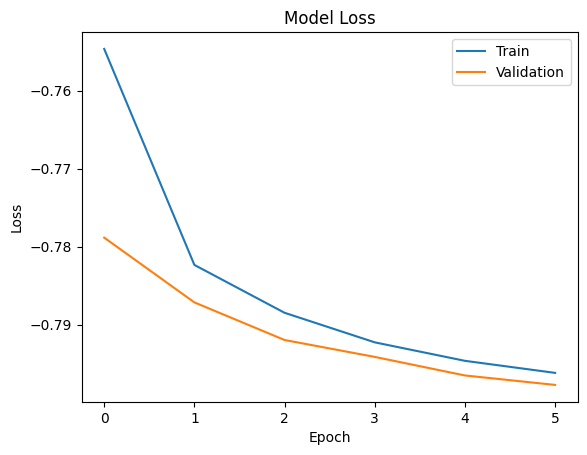

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
model_eval: float = model.evaluate(input_test, y_test_vecs) 
print(f"Model loss {model_eval}")

70/70 [==============================] - 18s 253ms/step - loss: -0.7940
Model loss -0.7939738631248474


1/1 [==============================] - 0s 15ms/step


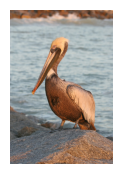

Prediction for image: gull, tork, swan-shaped, redwing, sparrow
1/1 [==============================] - 0s 22ms/step


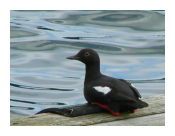

Prediction for image: ring-necked, swan-shaped, redwing, swan-neck, red-backed
1/1 [==============================] - 0s 22ms/step


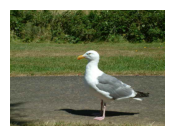

Prediction for image: gull, tern, fulmar, swan-shaped, black-headed
1/1 [==============================] - 0s 26ms/step


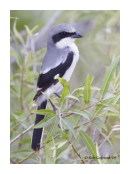

Prediction for image: redwing, humming-bird, wagtail, blue-tailed, catbird
1/1 [==============================] - 0s 18ms/step


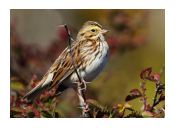

Prediction for image: sparrow, warbler, wagtail, sparrowhawk, sharp-tailed
1/1 [==============================] - 0s 22ms/step


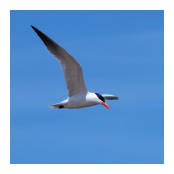

Prediction for image: tern, gull, fulmar, terns, swan-shaped
1/1 [==============================] - 0s 20ms/step


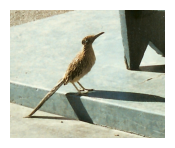

Prediction for image: sparrow, sparrowhawk, sharp-tailed, redwing, humming-bird
1/1 [==============================] - 0s 24ms/step


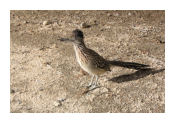

Prediction for image: sparrow, sparrowhawk, sharp-tailed, wagtail, redwing
1/1 [==============================] - 0s 17ms/step


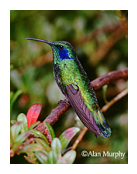

Prediction for image: warbler, blue-tailed, yellow-tailed, wagtail, catbird
1/1 [==============================] - 0s 29ms/step


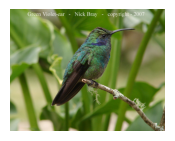

Prediction for image: blue-tailed, catbird, redtail, wagtail, redwing
1/1 [==============================] - 0s 24ms/step


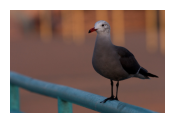

Prediction for image: gull, tern, redwing, swan-neck, swan-shaped
1/1 [==============================] - 0s 20ms/step


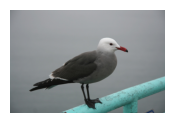

Prediction for image: gull, tern, fulmar, swan-shaped, swan-neck
1/1 [==============================] - 0s 21ms/step


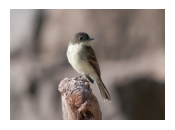

Prediction for image: sparrow, sharp-tailed, wagtail, sparrowhawk, humming-bird
1/1 [==============================] - 0s 25ms/step


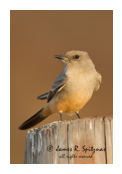

Prediction for image: redwing, humming-bird, catbird, wagtail, sharp-tailed
1/1 [==============================] - 0s 19ms/step


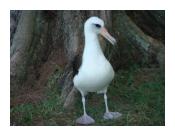

Prediction for image: gull, tern, fulmar, tork, swan-shaped
1/1 [==============================] - 0s 26ms/step


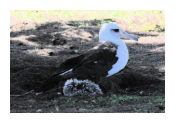

Prediction for image: swan-shaped, gull, swan-neck, tork, redwing
1/1 [==============================] - 0s 19ms/step


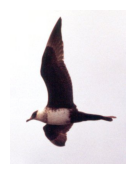

Prediction for image: swan-shaped, swan-neck, red-backed, sharp-tailed, black-headed
1/1 [==============================] - 0s 30ms/step


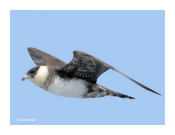

Prediction for image: sharp-tailed, redwing, swan-neck, swan-shaped, wagtail


In [31]:
images_paths: List[str] = [
               './demo_images/seen/Brown_Pelican.jpg',
                './demo_images/seen/Pigeon_Guillemot.jpg',
                './demo_images/seen/Western_Gull.jpg',
                './demo_images/seen/Loggerhead_Shrike.jpg',
                './demo_images/seen/Savannah_Sparrow.jpg',
                './demo_images/seen/Caspian_Tern.jpg',
                './demo_images/unseen/Geococcyx_1.jpg',
                './demo_images/unseen/Geococcyx_2.jpg',
                './demo_images/unseen/Green_Violetear_1.jpg',
                './demo_images/unseen/Green_Violetear_2.jpg',
                './demo_images/unseen/Heermann_Gull_1.jpg',
                './demo_images/unseen/Heermann_Gull_2.jpg',
                './demo_images/unseen/Sayornis_1.jpg',
                './demo_images/unseen/Sayornis_2.jpg',
                './demo_images/unseen/Laysan_Albatross_1.jpg',
                './demo_images/unseen/Laysan_Albatross_2.jpg',
                './demo_images/unseen/Pomarine_Jaeger_1.jpg',
                './demo_images/unseen/Pomarine_Jaeger_2.jpg'
]

img_path: str = ''
for img_path in images_paths:
    img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
        img_path))

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
            img, (224, 224))), axis=0))

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # print the predictions for image
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")